In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Seaborn là libary visualize data phong phú và phức tạp do đó sẽ được chia ra các loại plot chứ không xắp xếp cơ bản theo matplotlib.

Tuy nhiên một vài function của matplotlib cũng sử dụng được trong seaborn do seaborn là một phiên bản phong phú, phức tạp và thể hiện thông tin chi tiết hơn của matplotlib.

#  Categorical Plots

* Loại biểu đồ này cho phép chọn một biến số (numerical variable)và vẽ biểu đồ phân phối (plot the distribution) cho từng danh mục trong một biến phân loại (categorical variable) đã chọn. Bao gồm:

  * barplot
  * countplot
  * boxplot
  * violinplot
  * stripplot
  * swarmplot  
  * factorplot

In [ ]:
dataset = sns.load_dataset('tips')
dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# I) barplot

* Bar plot của seaborn có chức năng như một barplot thường ở matplotlib nhưng có một đặc điểm là có thêm 1 error bar

* Error bar:

  * Dùng để cải tiến đồ họa hiển thị trực quan sự biến đổi của dữ liệu được vẽ trên biểu đồ

  * Khi áp dụng cho bar plot sẽ cung cấp một lớp chi tiết bổ sung trên dữ liệu được trình bày

  * Giúp chỉ ra sai số ước tính hoặc độ không đảm bảo

  * Độ dài của thanh lỗi giúp tiết lộ sự không chắc chắn của một điểm dữ liệu:

      * Ngắn: hiển thị các giá trị được tập trung (concentreted), báo hiệu (signaling) giá trị trung bình (plotted averaged value) được vẽ trên đồ thị
      
      * Dài: hiển thị giá trị trải rộng (spread out) và ít tin cậy hơn (less reliable )

  * nếu dữ liệu bị lệch, độ dài của mỗi bên là không cân bằng

  * hiển thị cho: 
  
    * Độ lệch chuẩn (Standard Deviation) 
    
    * Lỗi chuẩn (Standard Error)
    
    * Khoảng tin cậy (Confidence Intervals)
    
    * Tối thiểu & Tối đa (Minimun & Maximum)

* Trong Barplot, error bar hiển thị mặc định cho Khoảng tin cậy (Confidence Intervals) mặc định 95%


## 1) Barplot (basic)

Mặc định barplot sẽ show giá trị mean và error plot khoảng tin cậy

## Thông số của:

barplot(

    x='sex', : dữ liệu cho cột x
    y='total_bill', : dữ liệu cho cột y
    data=dataset : tập dữ liệu
)

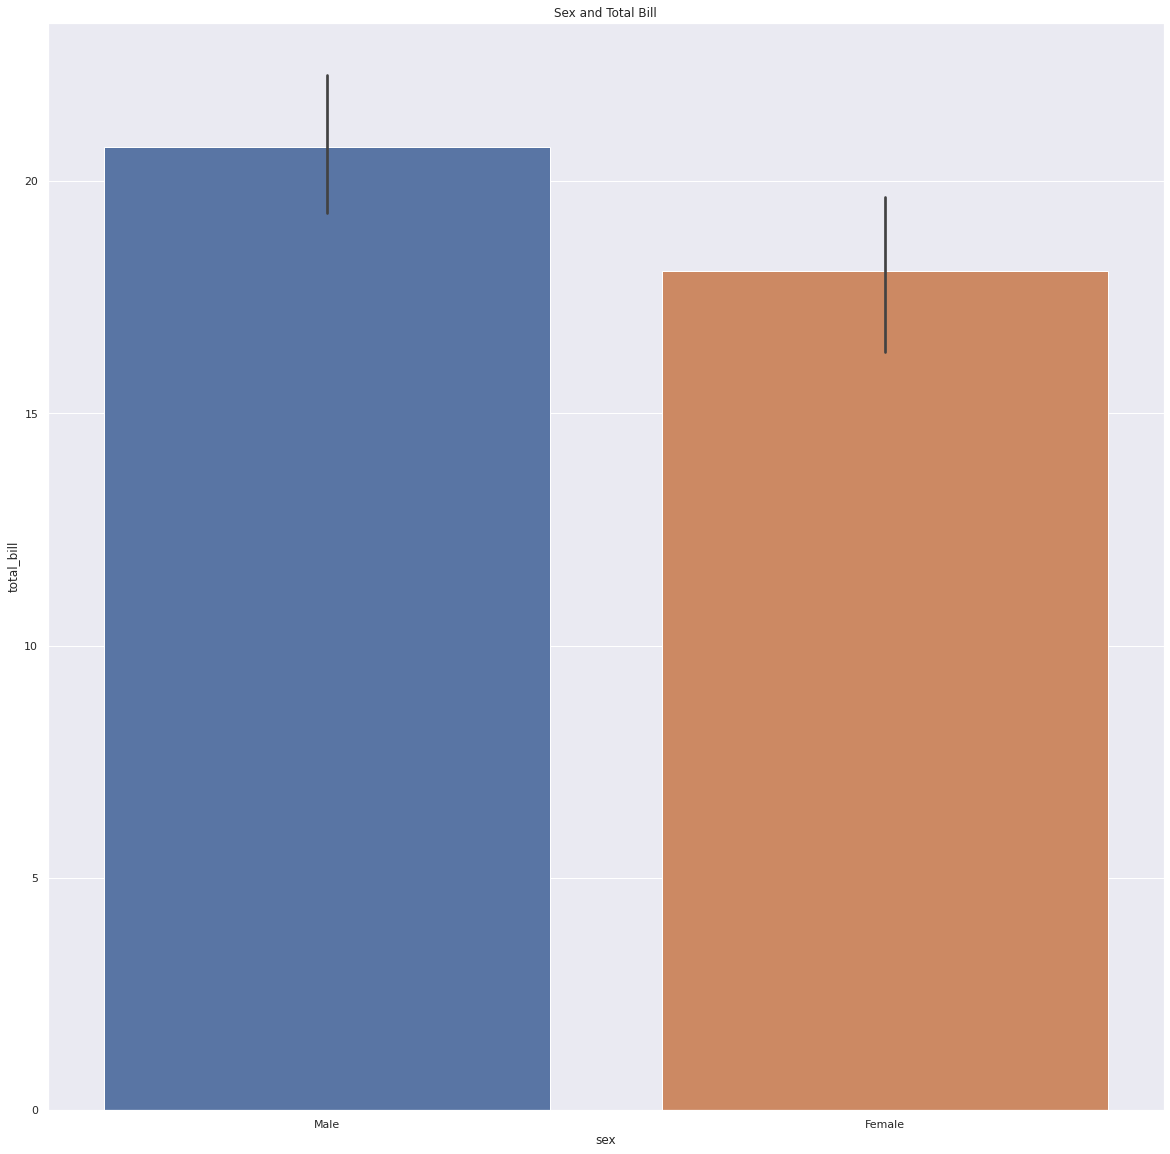

In [ ]:
sns.barplot(x='sex',y='total_bill',data=dataset)
plt.title('Sex and Total Bill')

plt.show()

In [ ]:
dataset.groupby('sex').total_bill.mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

## 2) Barplot with customize Confidence Intervals





## Thông số của:

barplot(

    x='sex', : dữ liệu cho cột x
    y='total_bill', : dữ liệu cho cột y
    data=dataset, : tập dữ liệu
    ci=65 : Confidence Intervals (khoảng tin cậy) mặc định 95% thay đổi bằng 65% 
)

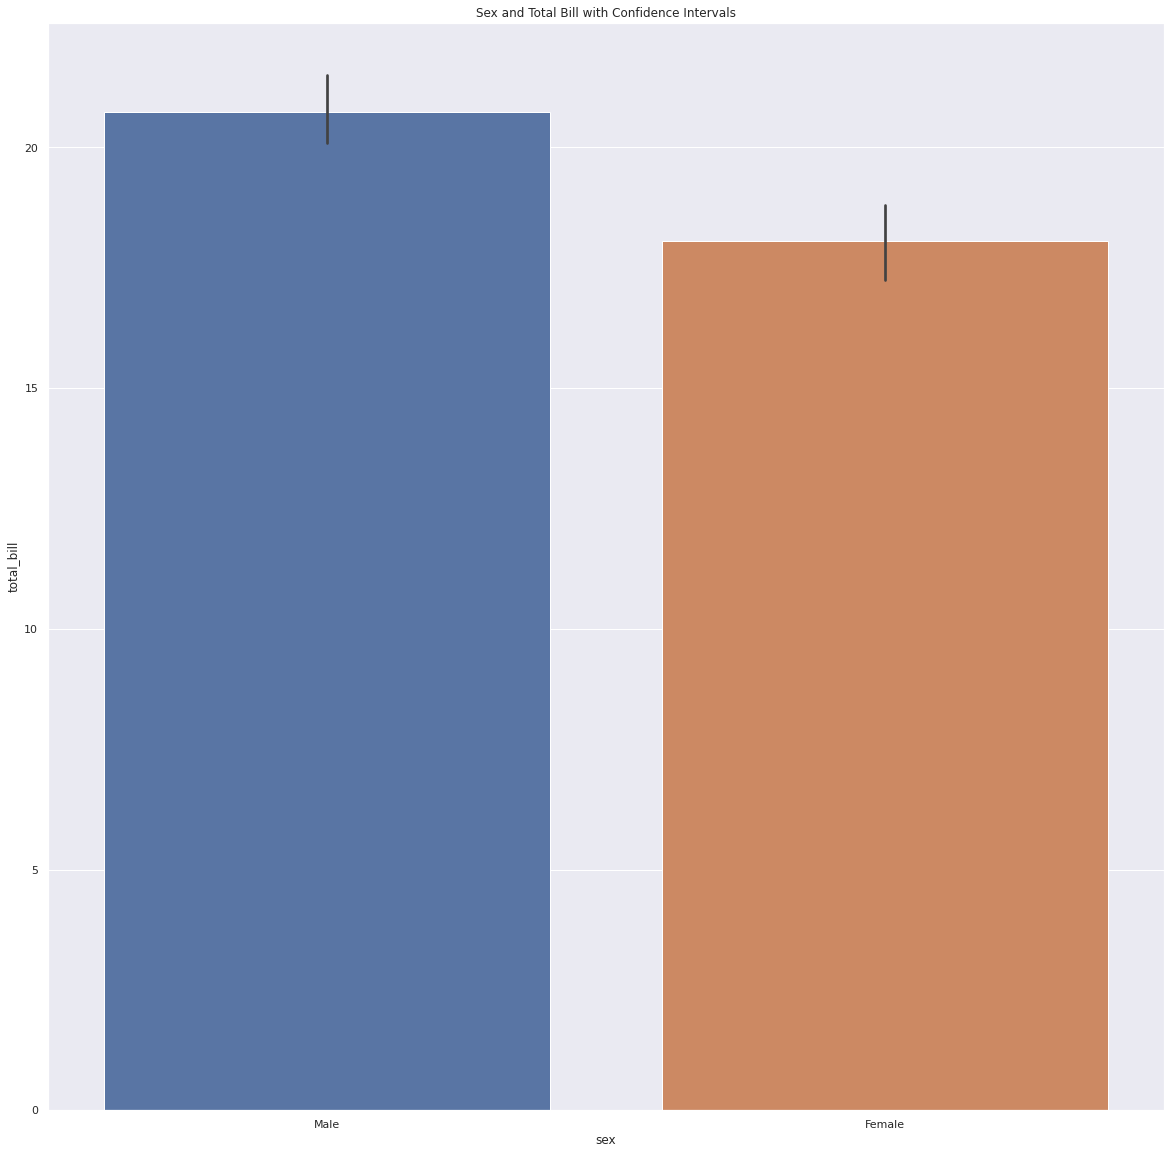

In [ ]:
sns.barplot(x='sex',y='total_bill',data=dataset, ci=65)
plt.title('Sex and Total Bill with Confidence Intervals')

plt.show()

## 3) Barplot with different estimator



Em có thể thay đổi cách tính thông qua "estimator=" các thuật toán pass in sẽ ở trong numpy

## Thông số của:

barplot(

    x='sex', : dữ liệu cho cột x
    y='total_bill', : dữ liệu cho cột y
    data=dataset, : tập dữ liệu
    estimator=np.std : Thay đổi cách tính dựa trên numpy (ví dụ np.std, np.max, ...)

)

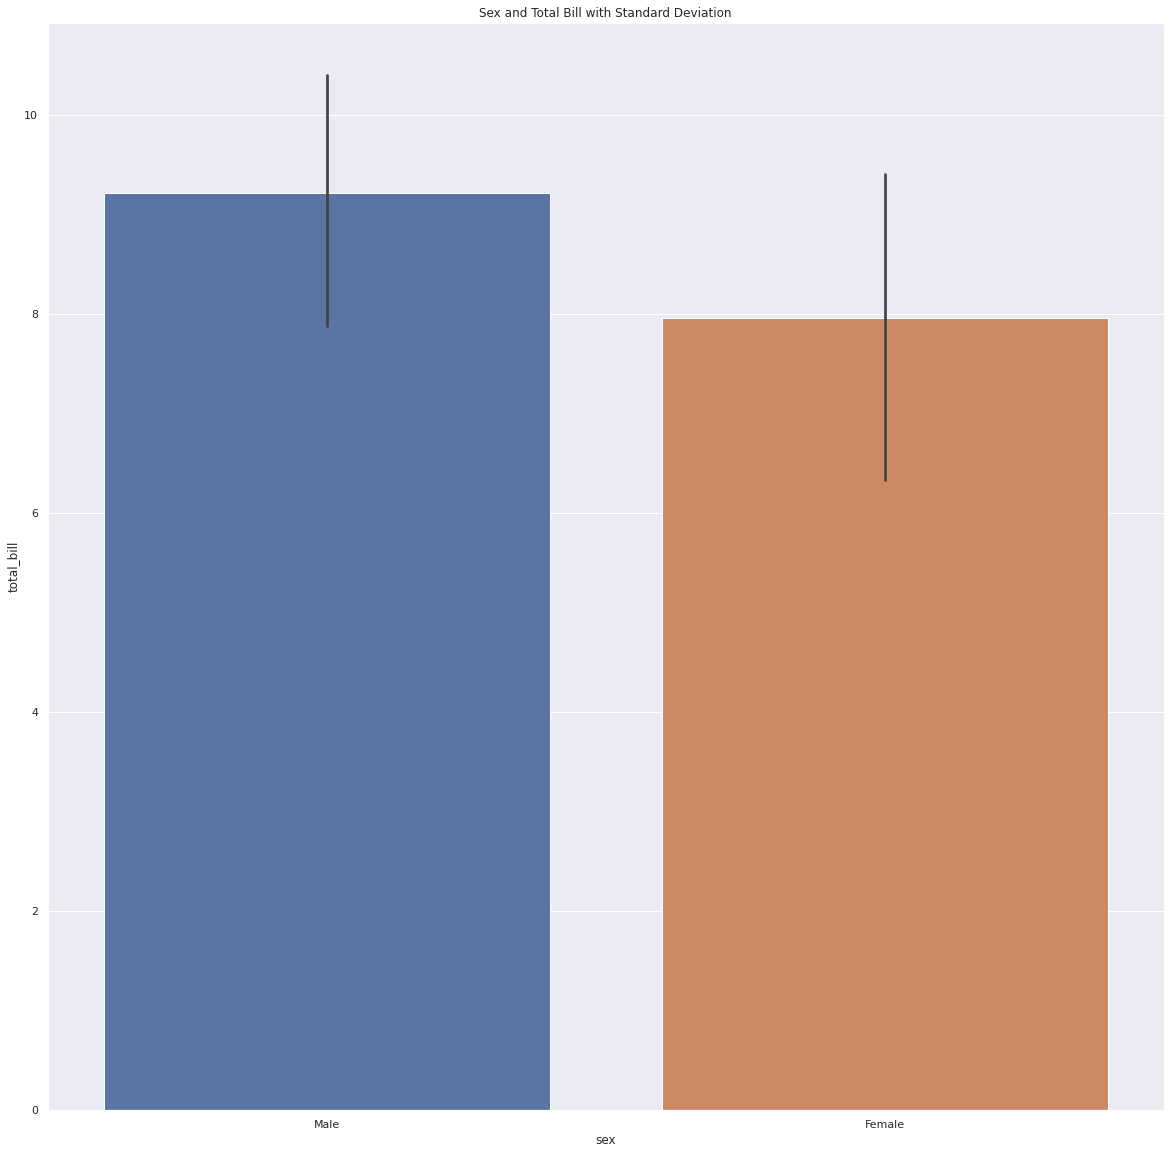

In [ ]:
sns.barplot(x='sex',
            y='total_bill',
            data=dataset, 
            estimator=np.std)
plt.title('Sex and Total Bill with Standard Deviation')

plt.show()

## 4) Barplot without Confidence Intervals 

Em có thể tắt error bar bằng cách "ci=None" tắt Confidence Intervals của plot

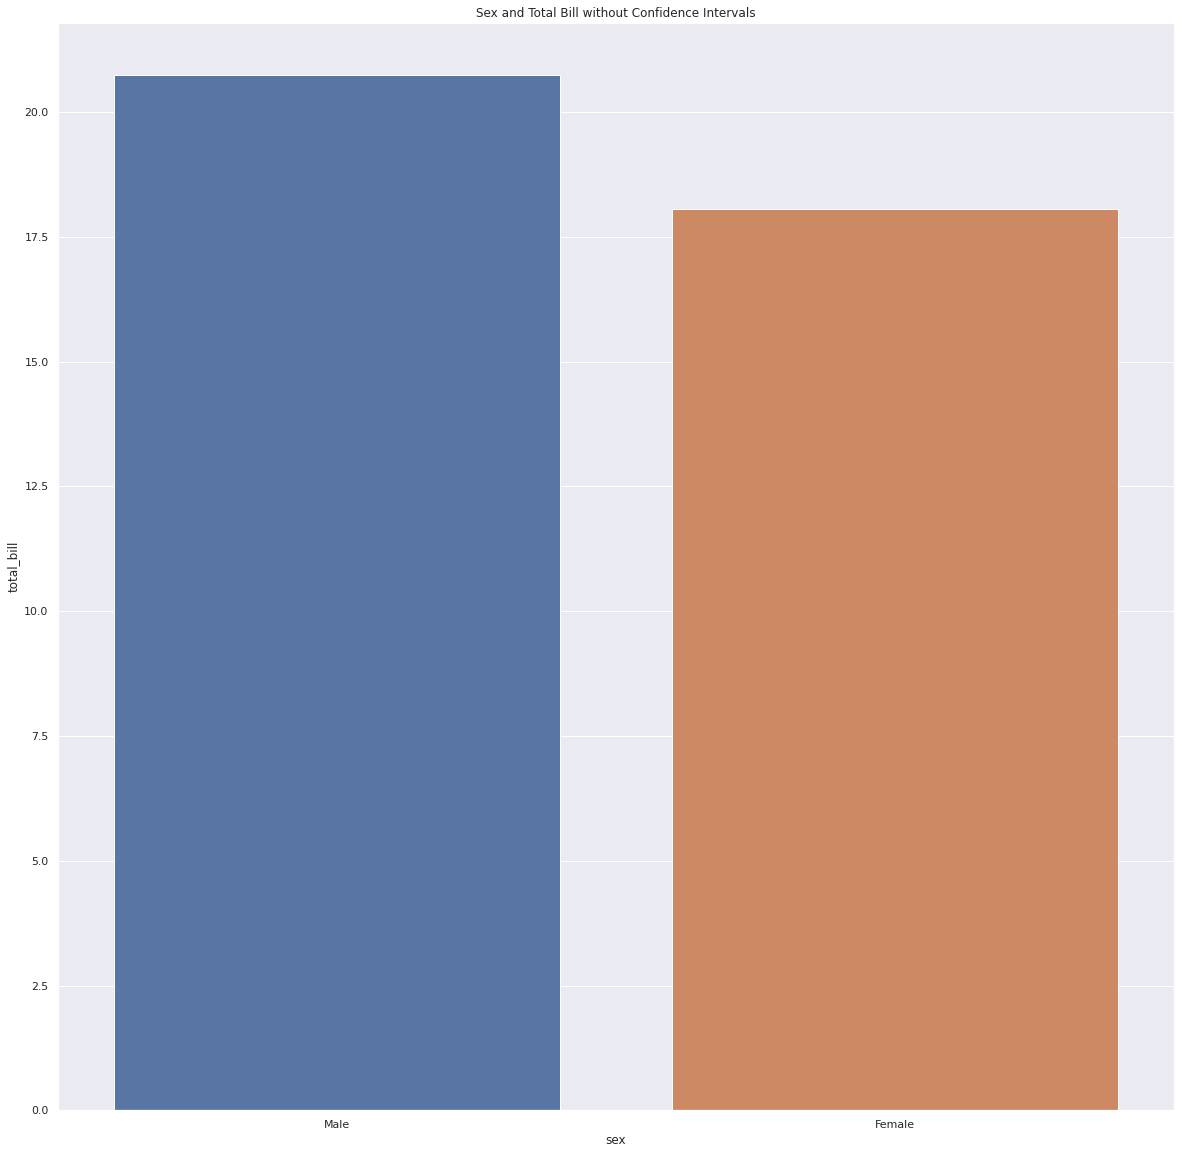

In [ ]:
sns.barplot(x='sex',y='total_bill',data=dataset, ci=None)
plt.title('Sex and Total Bill without Confidence Intervals')

plt.show()

## 4) Barplot with hue

Cũng như các plot khác em có thể thêm 1 categorical column vào plot sử dụng "hue="

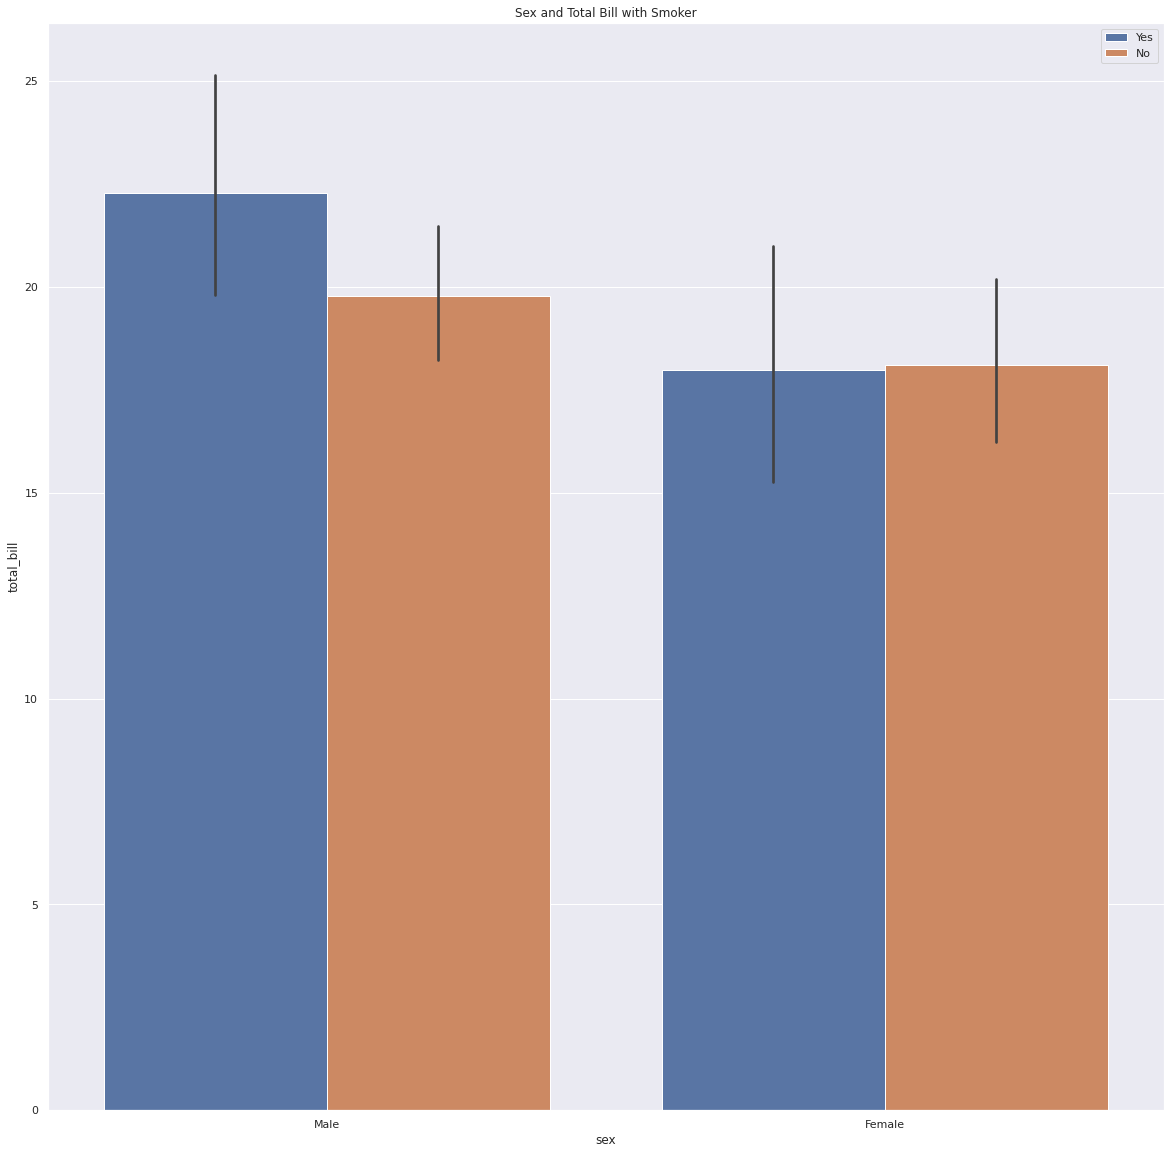

In [ ]:
sns.barplot(x='sex',
            y='total_bill',
            data=dataset, 
            hue = 'smoker')
plt.title('Sex and Total Bill with Smoker')

plt.legend(loc=1)
plt.show()

## 5) Barplot with reorganize order

Em có thể thay đổi vị trí của bar và hue

## Thông số của:

barplot(

    x='sex', : dữ liệu cho cột x
    y='total_bill', : dữ liệu cho cột y
    data=dataset, : tập dữ liệu
    hue = 'smoker', : giá trị hue của cột categorical là "smoke"
    order = ['Female', 'Male'], : xắp xếp vị trí bar theo list
    hue_order = ['No', 'Yes'] : xắp xếp vị trí hue theo list


)

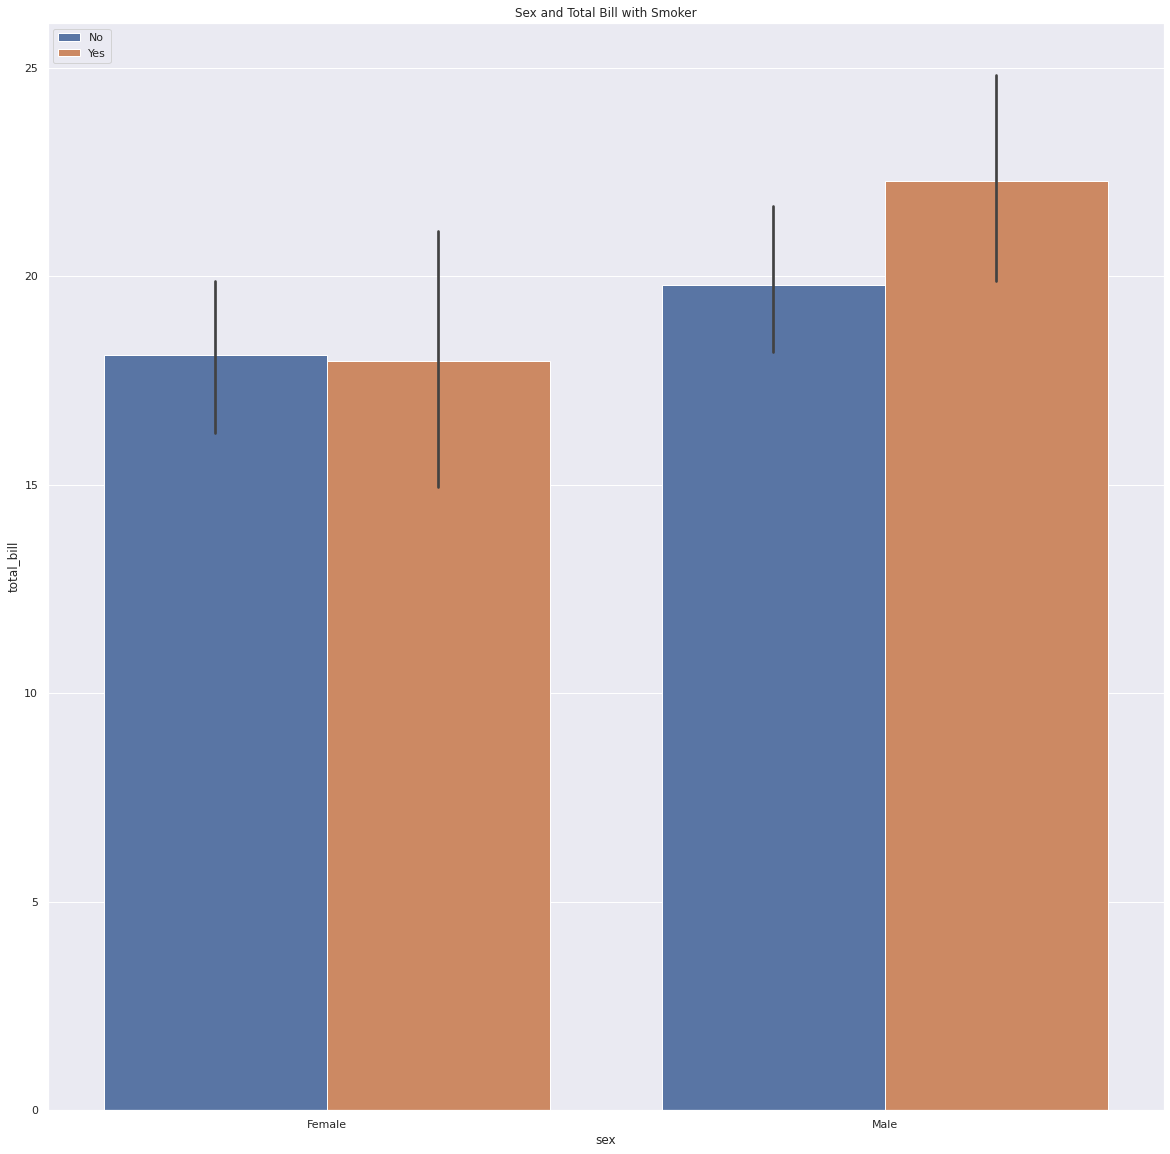

In [ ]:
sns.barplot(x='sex',
            y='total_bill',
            data=dataset, 
            hue = 'smoker',
            order = ['Female', 'Male'],
            hue_order = ['No', 'Yes'])
plt.title('Sex and Total Bill with Smoker')

plt.legend(loc=2)
plt.show()

## 6) Barplot with customize bar colour and error bar

Em có thể thay đổi màu của bar và màu, chiều rộng hue

## Thông số của:

barplot(

    x='sex', : dữ liệu cho cột x
    y='total_bill', : dữ liệu cho cột y
    data=dataset, : tập dữ liệu
    palette='summer', : thay đổi tập màu của bar
    errcolor='red', : Thay đổi màu của error bar
    errwidth=8, : Thay đổi chiều rộng của error bar)


)

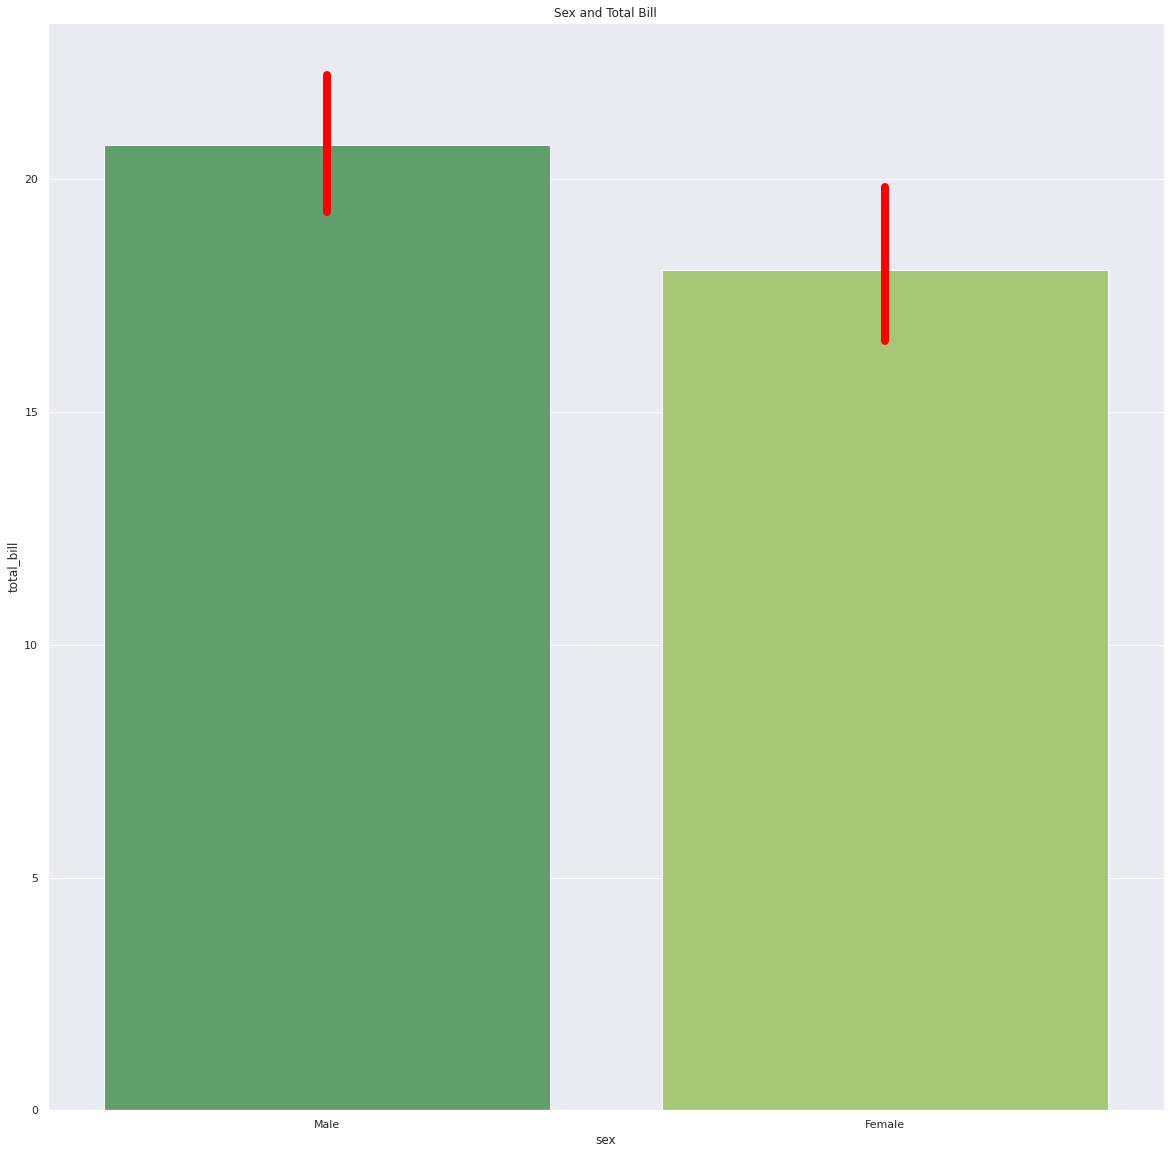

In [ ]:
sns.barplot(x='sex',
            y='total_bill',
            data=dataset,
            palette='summer',
            errcolor='red',
            errwidth=8,)
plt.title('Sex and Total Bill')

plt.show()

# Countplot

* Countplot chỉ plot số lượng của categorical values chứ không có áp dụng các phép toán như barplot

## 1) Countplot (basic)

## Thông số của:

countplot(
  
    x='smoker', : Dữ liệu cần đếm
    data = dataset : Tập dữ liệu)

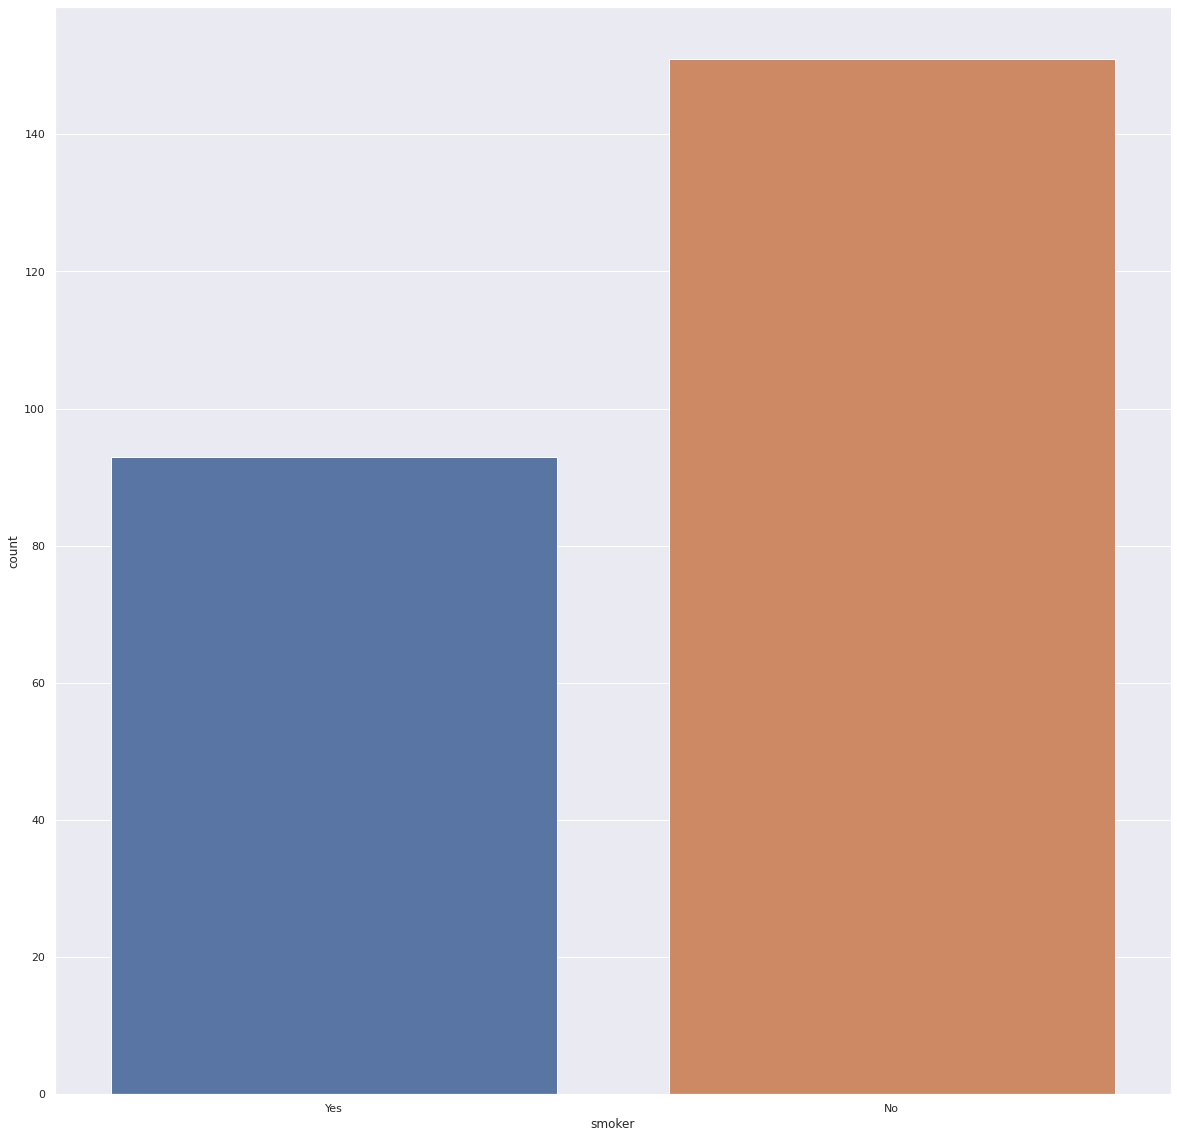

In [ ]:
sns.countplot(x='smoker', data = dataset)

In [ ]:
dataset.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

Thứ tự countplot xắp xếp dựa trên ".cat.categories" order

In [ ]:
dataset.smoker.cat.categories

Index(['Yes', 'No'], dtype='object')

## 2) Countplot with customize order

Em sẽ tiến hành thay đổi thứ tự dựa trên list mới tạo và đặt vào "order="

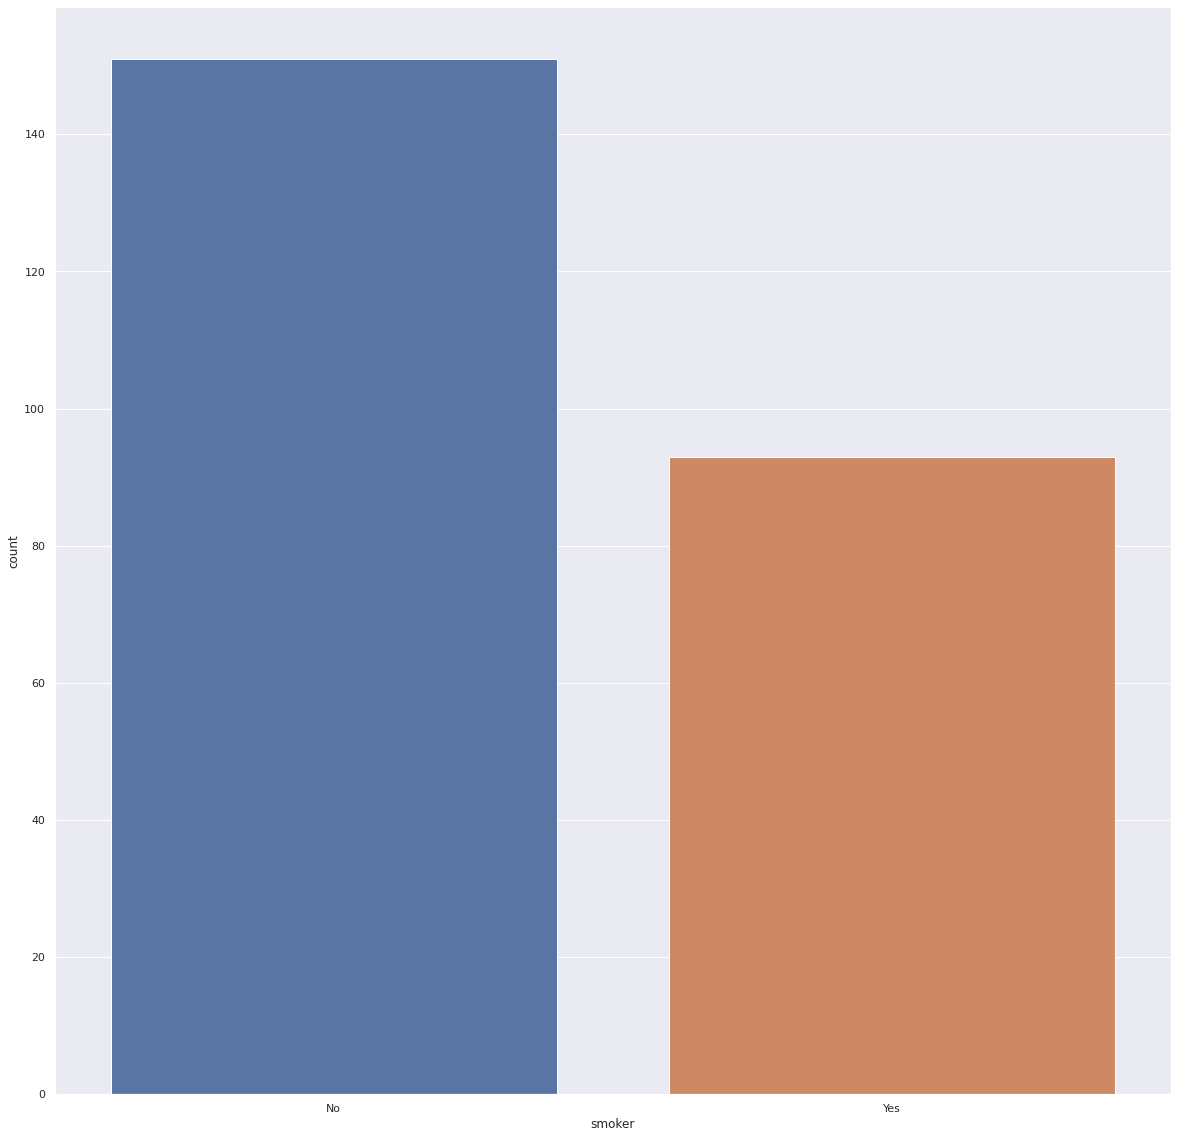

In [ ]:
order_ny = ['No', 'Yes']
sns.countplot(x='smoker', data = dataset, order=order_ny)

## 3) Countplot with hue

Cũng như các plot khác em có thể thêm 1 categorical column vào plot sử dụng "hue="

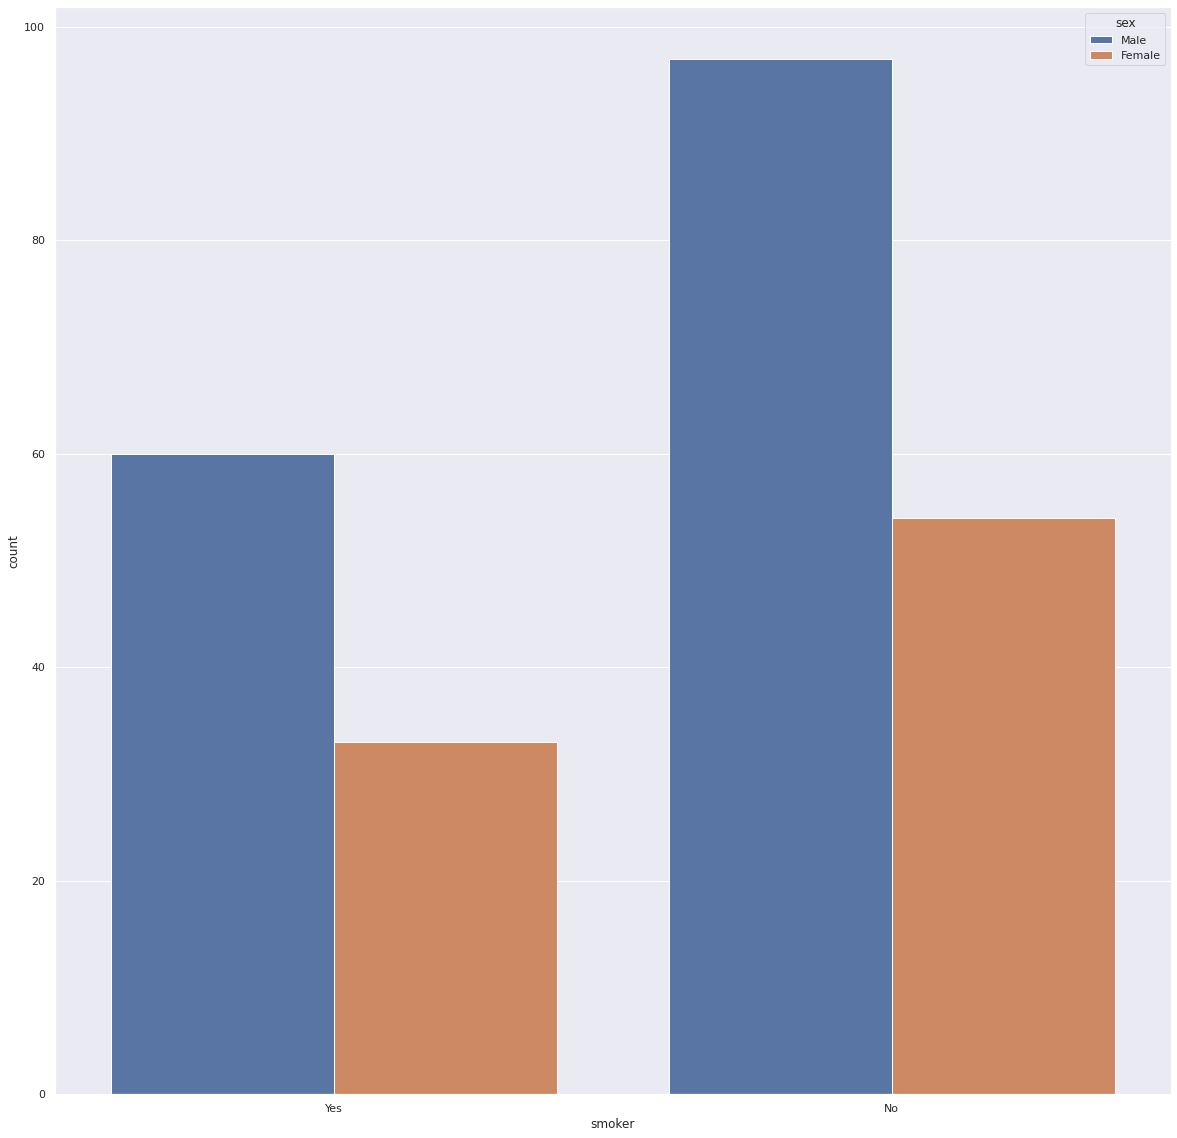

In [ ]:
sns.countplot(x='smoker', data = dataset, hue='sex')

# III) Boxplot (Categorical Distribution Plots)

Do được kế thừa từ Matplotlib nên công dụng và một vài chức năng vẫn được giữ

# 1) Boxplot (basic)

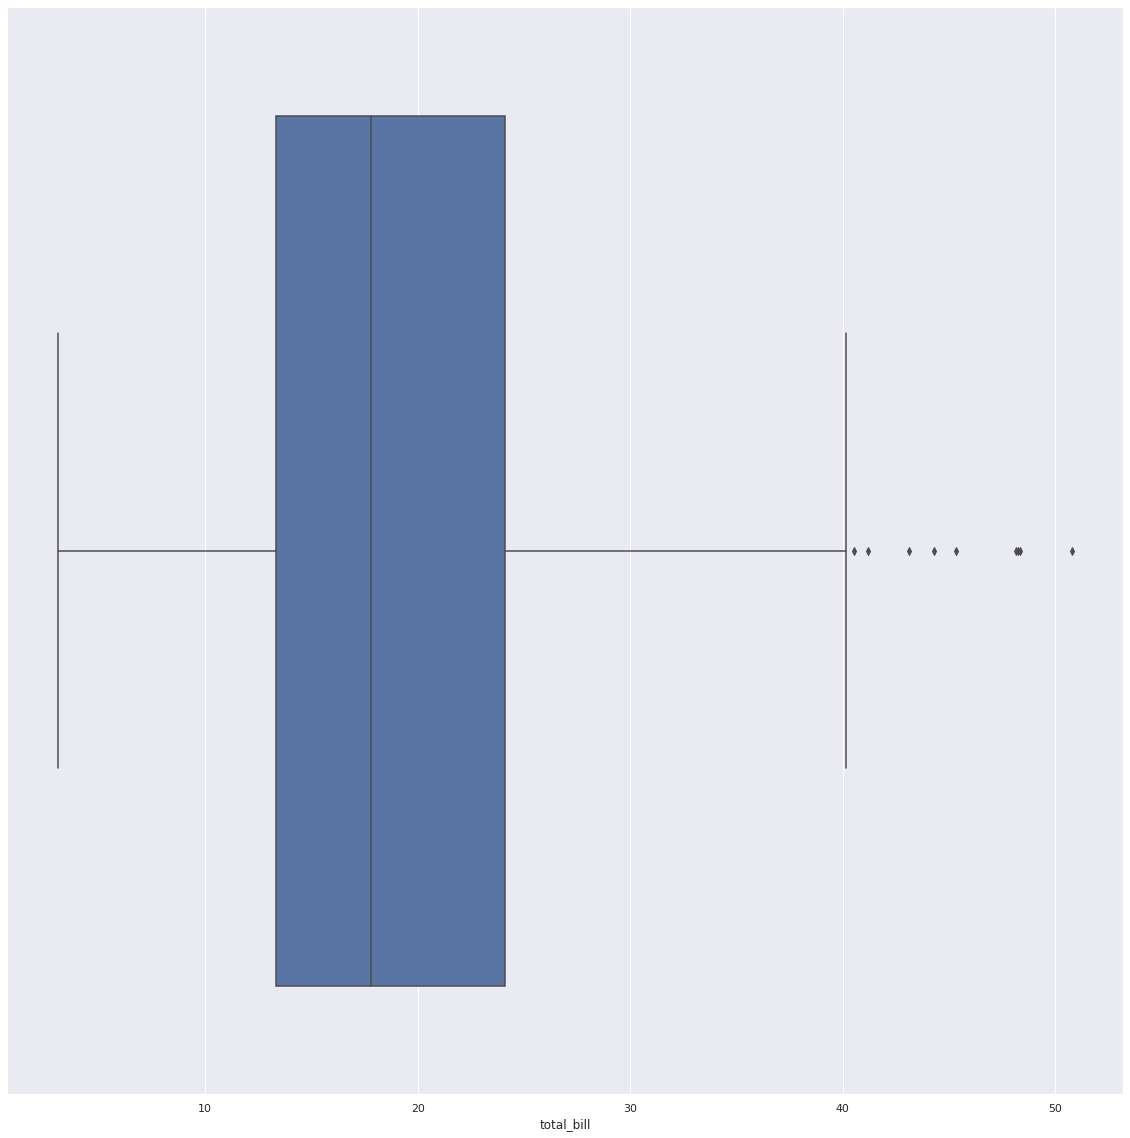

In [ ]:
sns.boxplot(dataset.total_bill)

In [ ]:
dataset.total_bill.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

## 2) Multiple Boxplot with hue

Vẫn giữ được chức năng tại matplotlib và có thêm 1 categorical column vào plot sử dụng "hue="

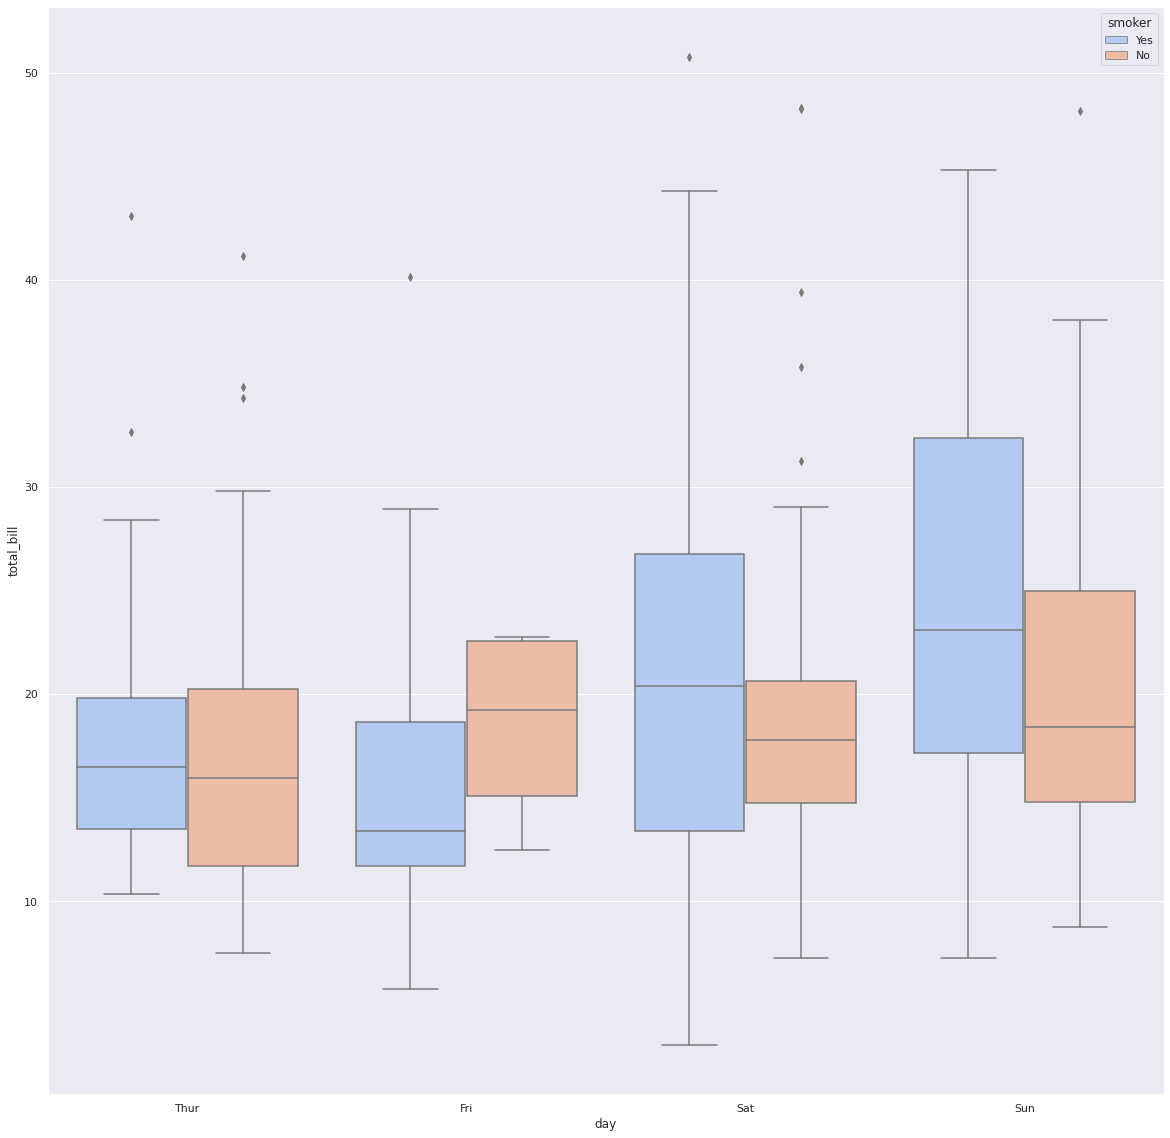

In [ ]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=dataset, palette="coolwarm");

## 3) Multiple Boxplot with different order and resize box

Em có thể thay đổi list thứ tự và thay đổi kích thước box và viền box

## Thông số của:

boxplot(
  
    x="day", : giá trị cho cột x
    y="total_bill", : giá trị cho cột y
    hue="smoker", : giá trị cho hue
    data=dataset, : bộ dữ liệu
    palette="coolwarm", : bộ màu của box
    order=['Sun', 'Sat', 'Fri', 'Thur'], : thứ tự của box
    hue_order=['No', 'Yes'], : thứ tự của hue
    width = 0.25, : chiều rộng của box
    linewidth = 3 : chiều rộng của viền box
);

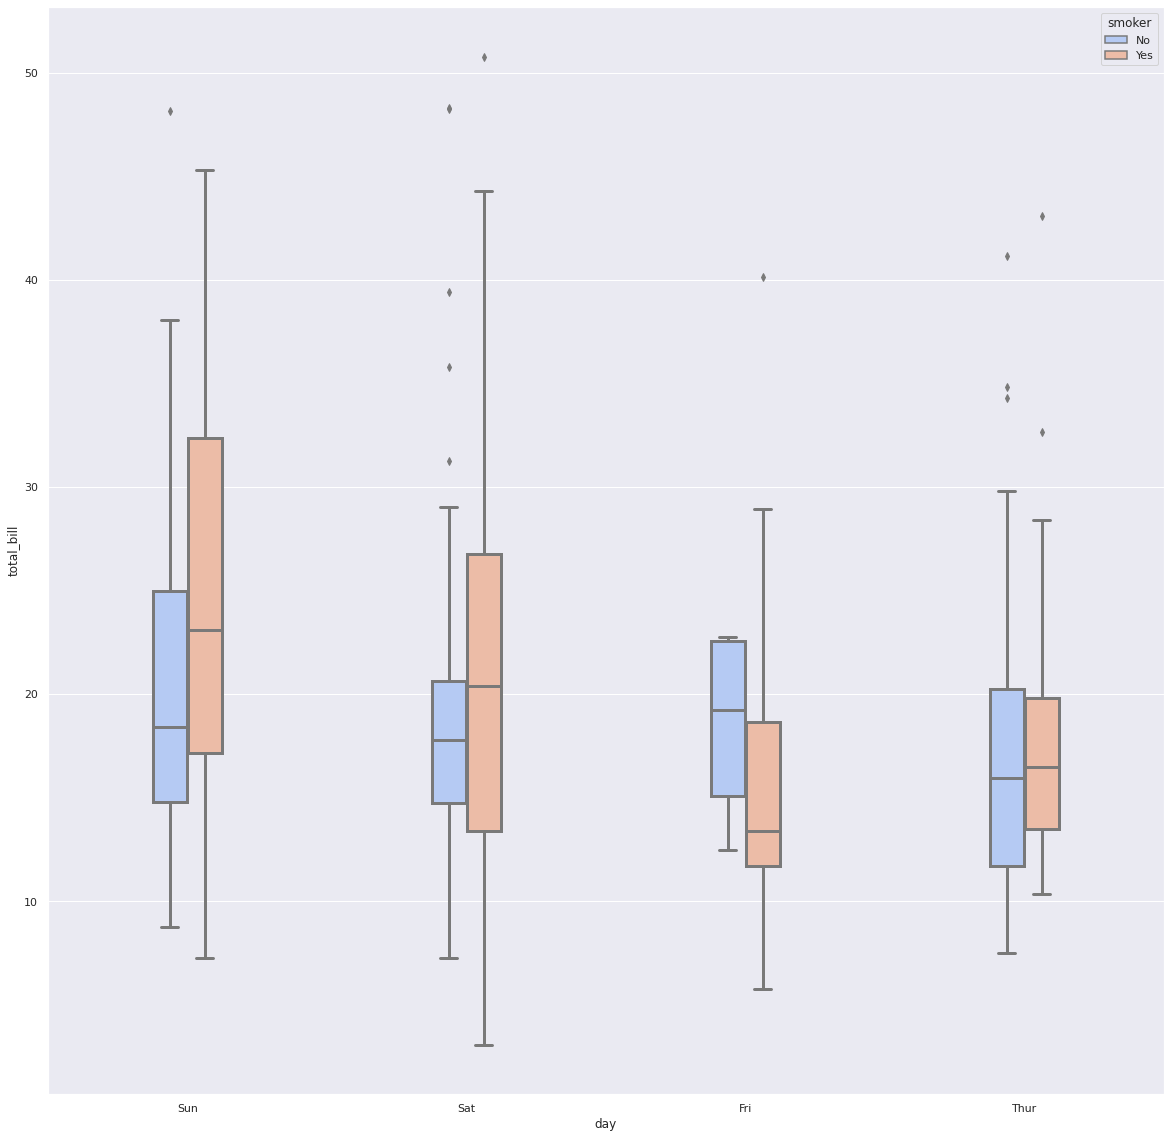

In [ ]:
sns.boxplot(x="day", 
            y="total_bill",
            hue="smoker",
            data=dataset, 
            palette="coolwarm",
            order=['Sun', 'Sat', 'Fri', 'Thur'], 
            hue_order=['No', 'Yes'],
            width = 0.25,
            linewidth = 3);

## 4) resize whisker to change outliner

Thông qua thay đổi thông số "whis=" sẽ ảnh hưởng độ dài whisker em sẽ thay đổi được số lượng outliner



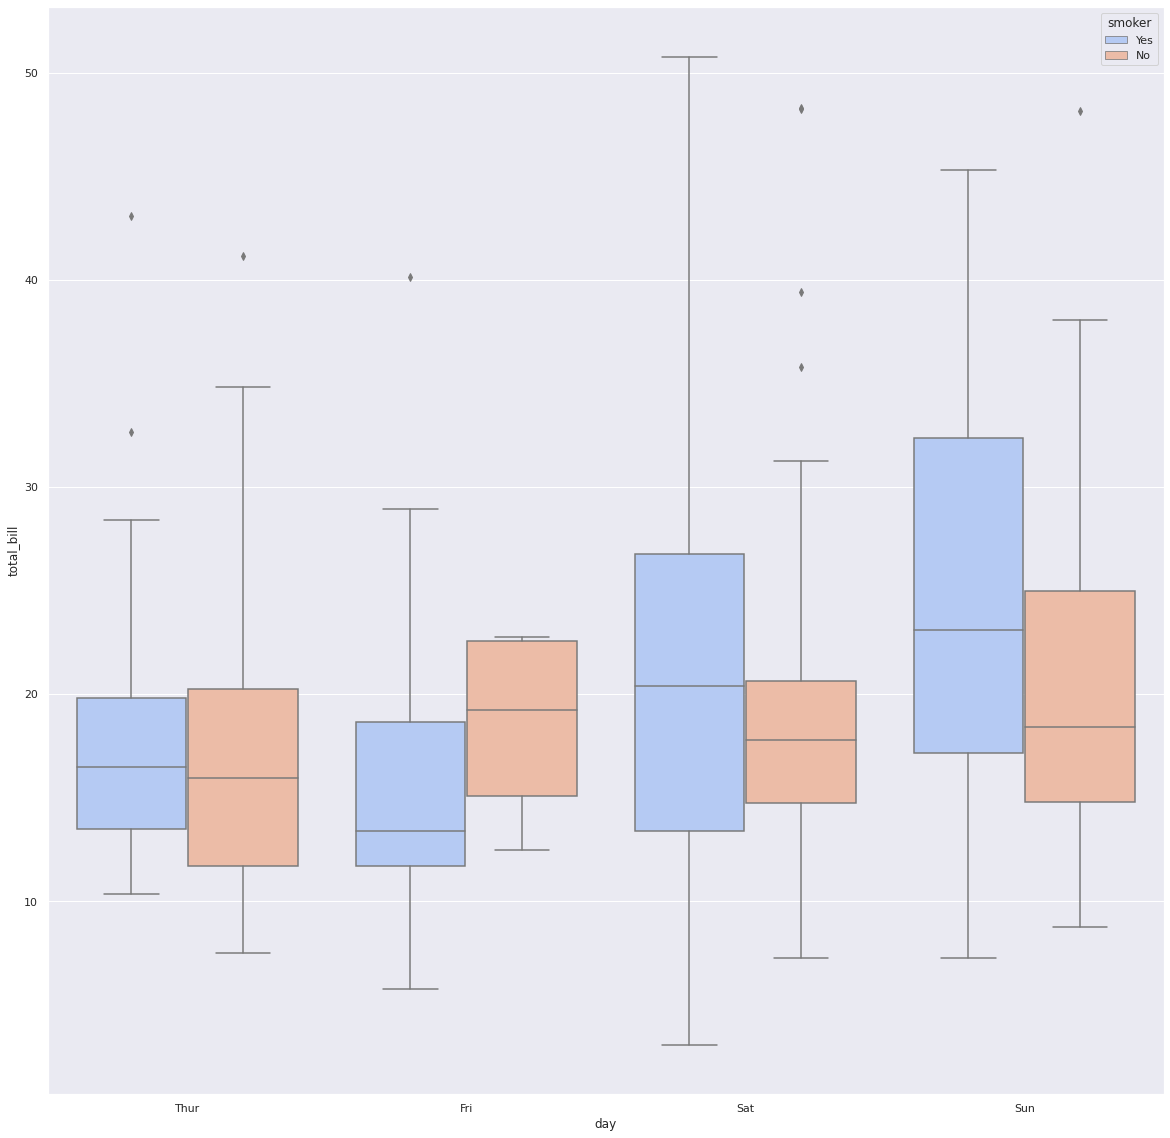

In [ ]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=dataset, palette="coolwarm", whis = 2);

## 5) Remove cap and resize outliner 

* Em tiến hành thay đổi thông số của "fliersize=" để thay đổi kích thước outliner

* Em có thể xóa cap bằng cách "showcaps=False" tắt show cap

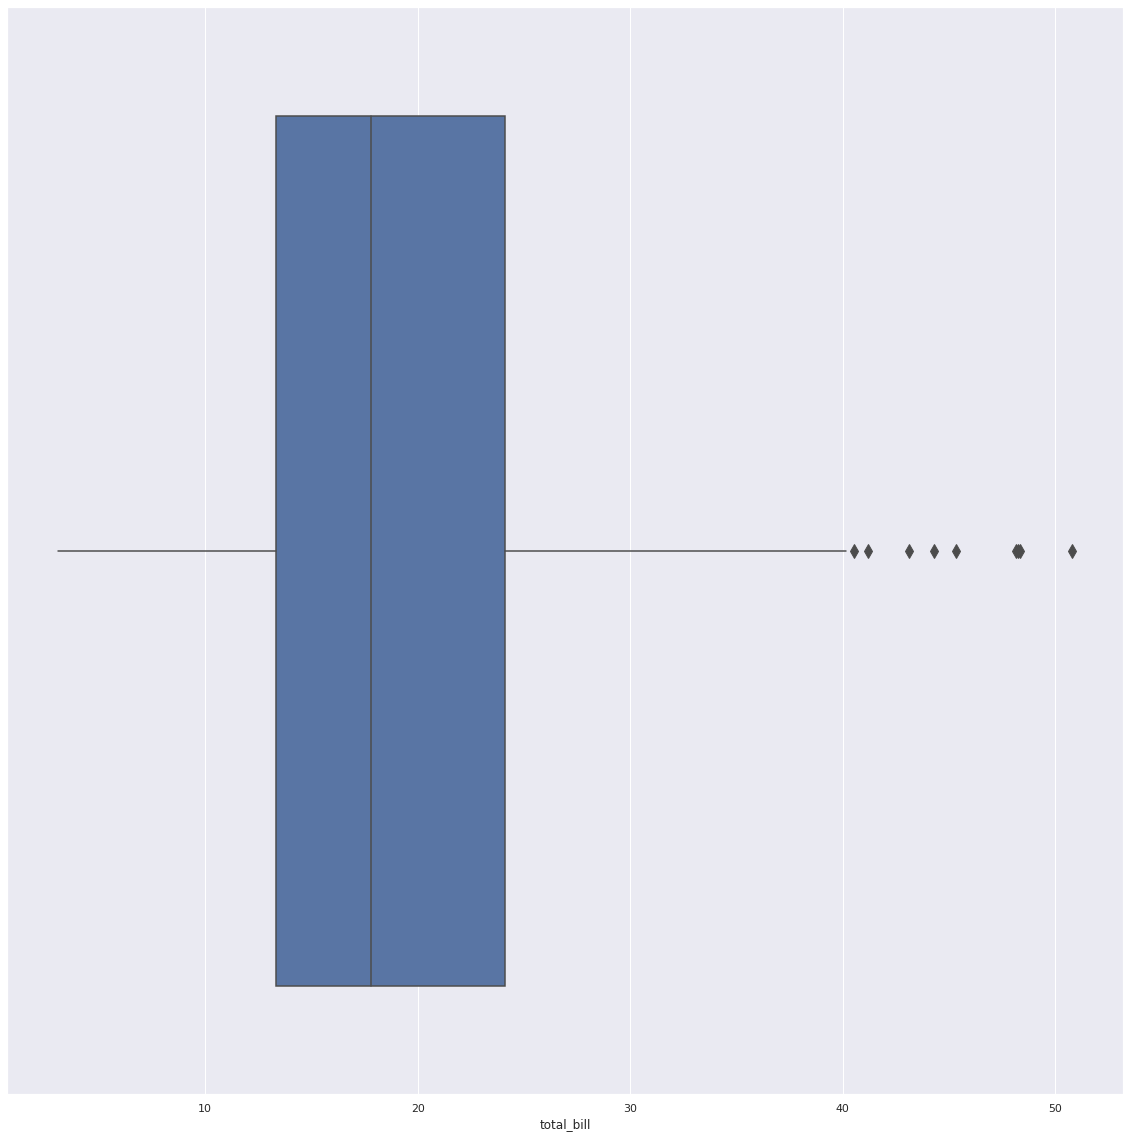

In [ ]:
sns.boxplot(dataset.total_bill, fliersize=10, showcaps=False);

# III) Violinplot (Categorical Distribution Plots)

* Violinplot là tập hợp của 1 boxplot và 2 kde plot ở hai bên

* Boxplot ở giữa violinplot vẫn có đầy đủ: whisker, box, cap, median (từ line thành dấu chấm trong box)

* Thay vì show ra outliner thì violinplot có kde để thể hiện hàm mật độ xác suất (probability density function)

## 1) Violinplot (basic)

## Thông số của:

violinplot(
  
    dataset.total_bill : nhập dữ liệu
    
);

sns.set(rc = {'figure.figsize':(20,20)}); : 

seaborn set up tự động chạy khi bắ đầu và Định cấu hình (automatically Run at startup and they Configure) với dictionary bao gồm figure và figsize là 20 x20

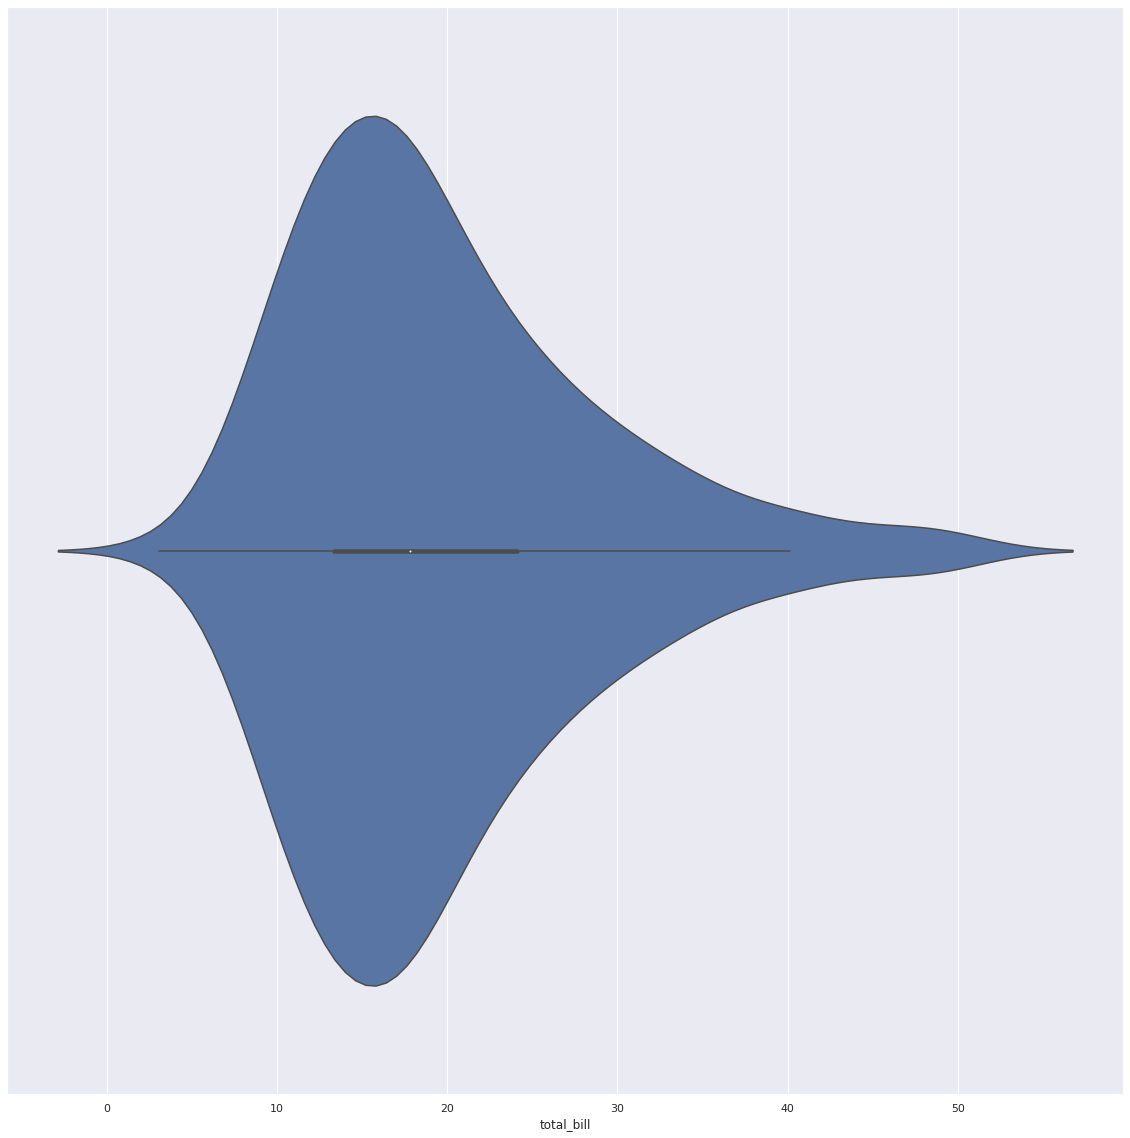

In [ ]:
sns.violinplot(dataset.total_bill);
sns.set(rc = {'figure.figsize':(20,20)});

## 2) Multiple Violinplot 

Các thông số cũng như các plot trên

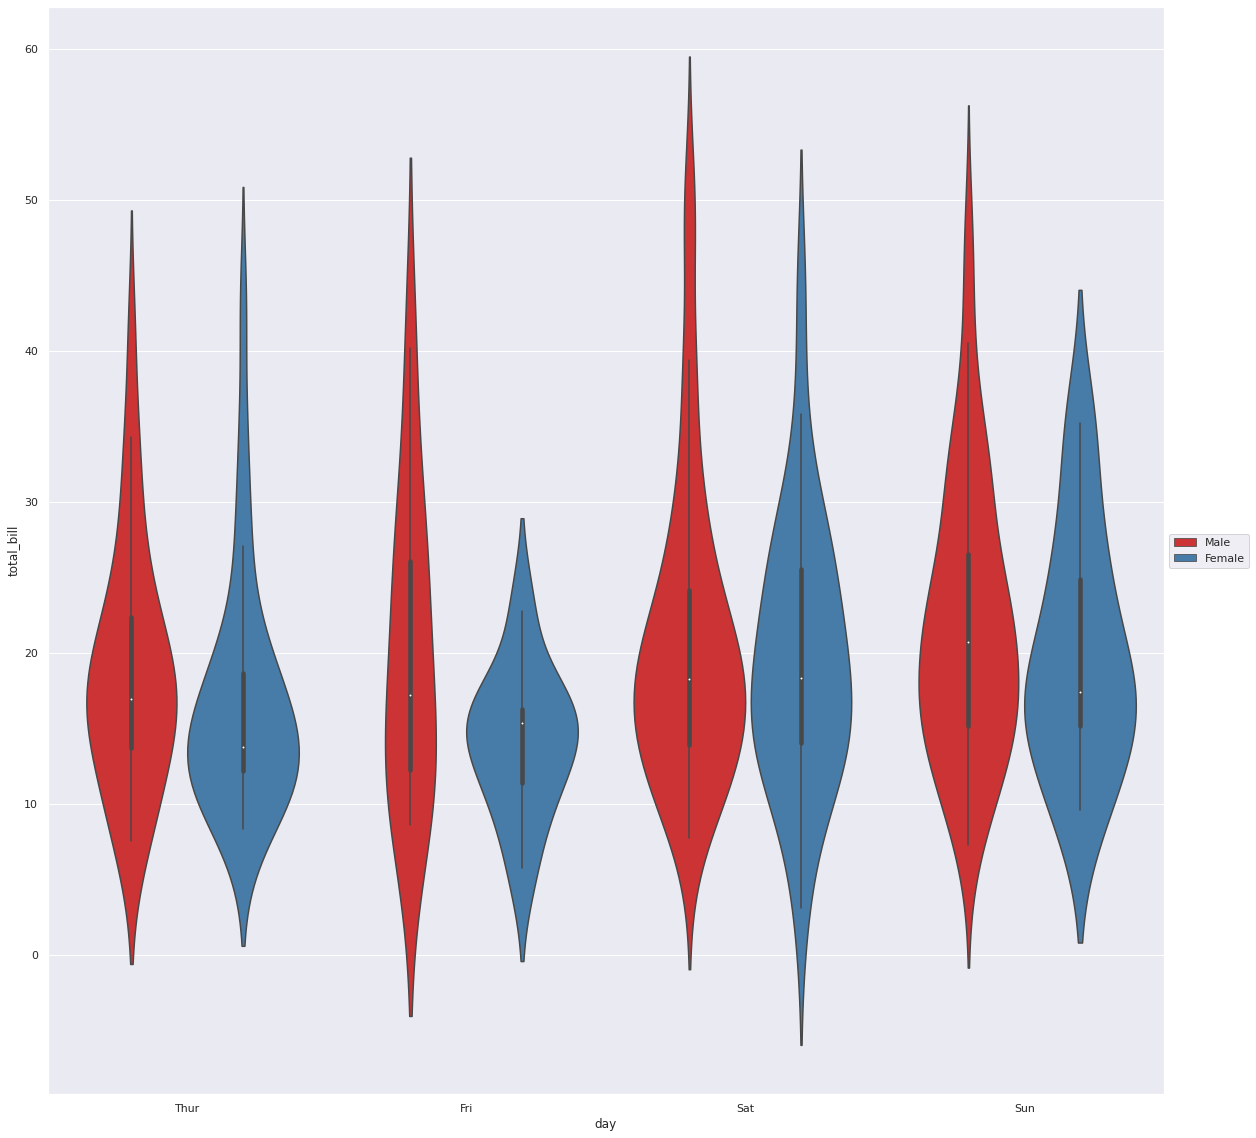

In [ ]:
sns.violinplot(x="day", y="total_bill", data=dataset,hue='sex',palette='Set1');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));


## 3) Splited violinplot and show interquartile

* split chỉ sử dụng được khi chỉ 2 categorical hue

* Với chức năng "split=True" em có thể split ra và show 2 categorical hue trong 1 violinplot

* Với "inner= 'quartiles'" em sẽ thấy Interquartile range của box


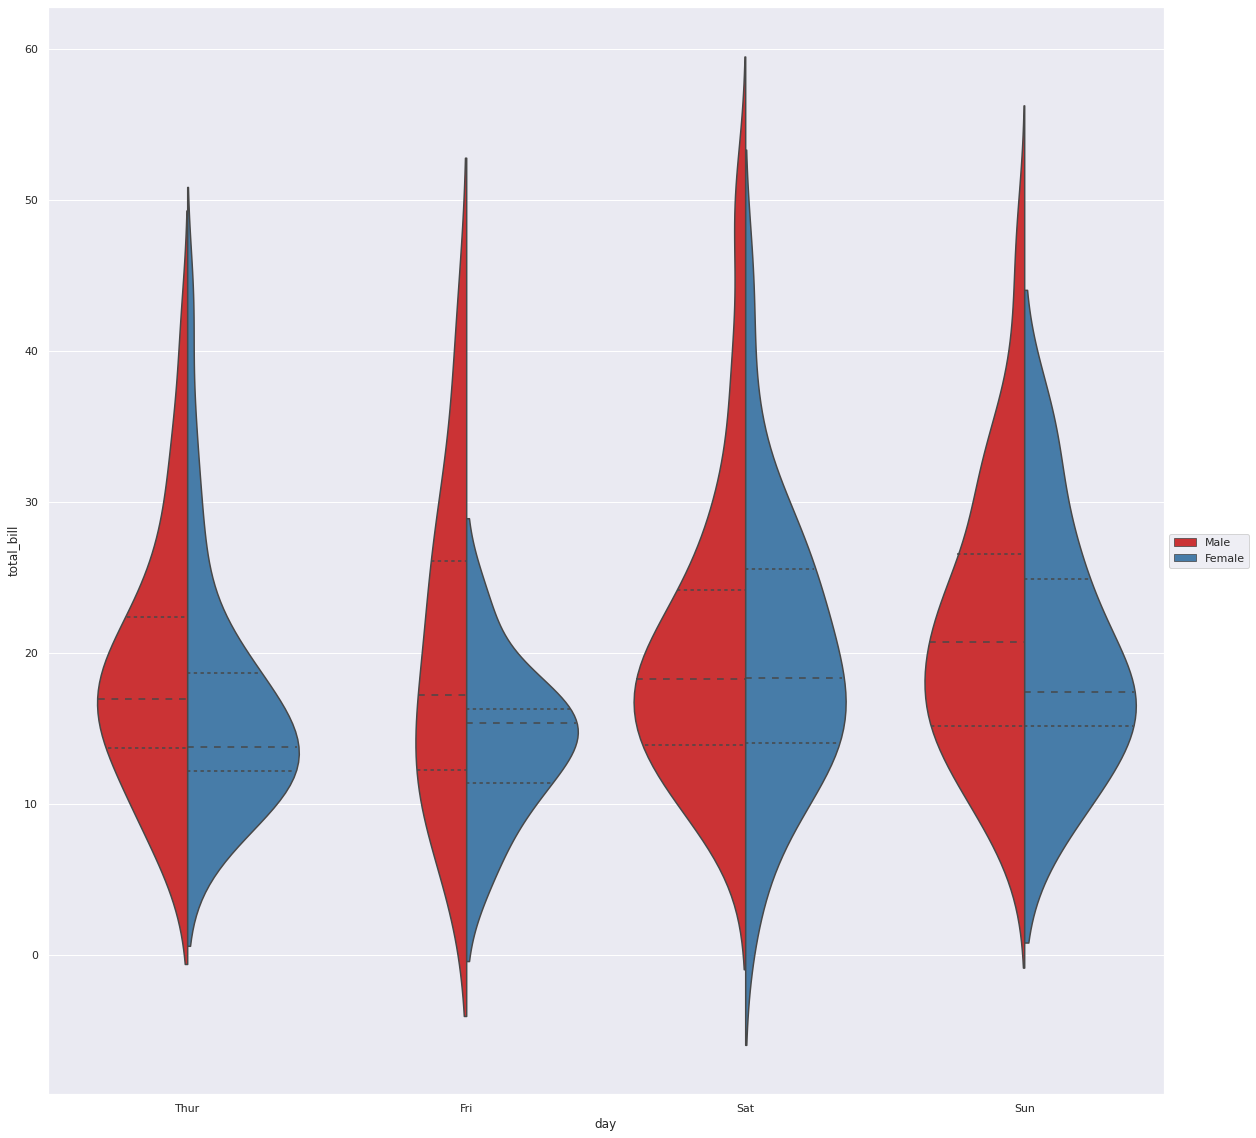

In [ ]:
sns.violinplot(x="day", 
               y="total_bill", 
               data=dataset,
               hue='sex',
               split=True,
               inner= 'quartiles',
               palette='Set1');


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## 4) Scaled violinplot

* Với " scale='count' " em có thể scale theo số observation đang có

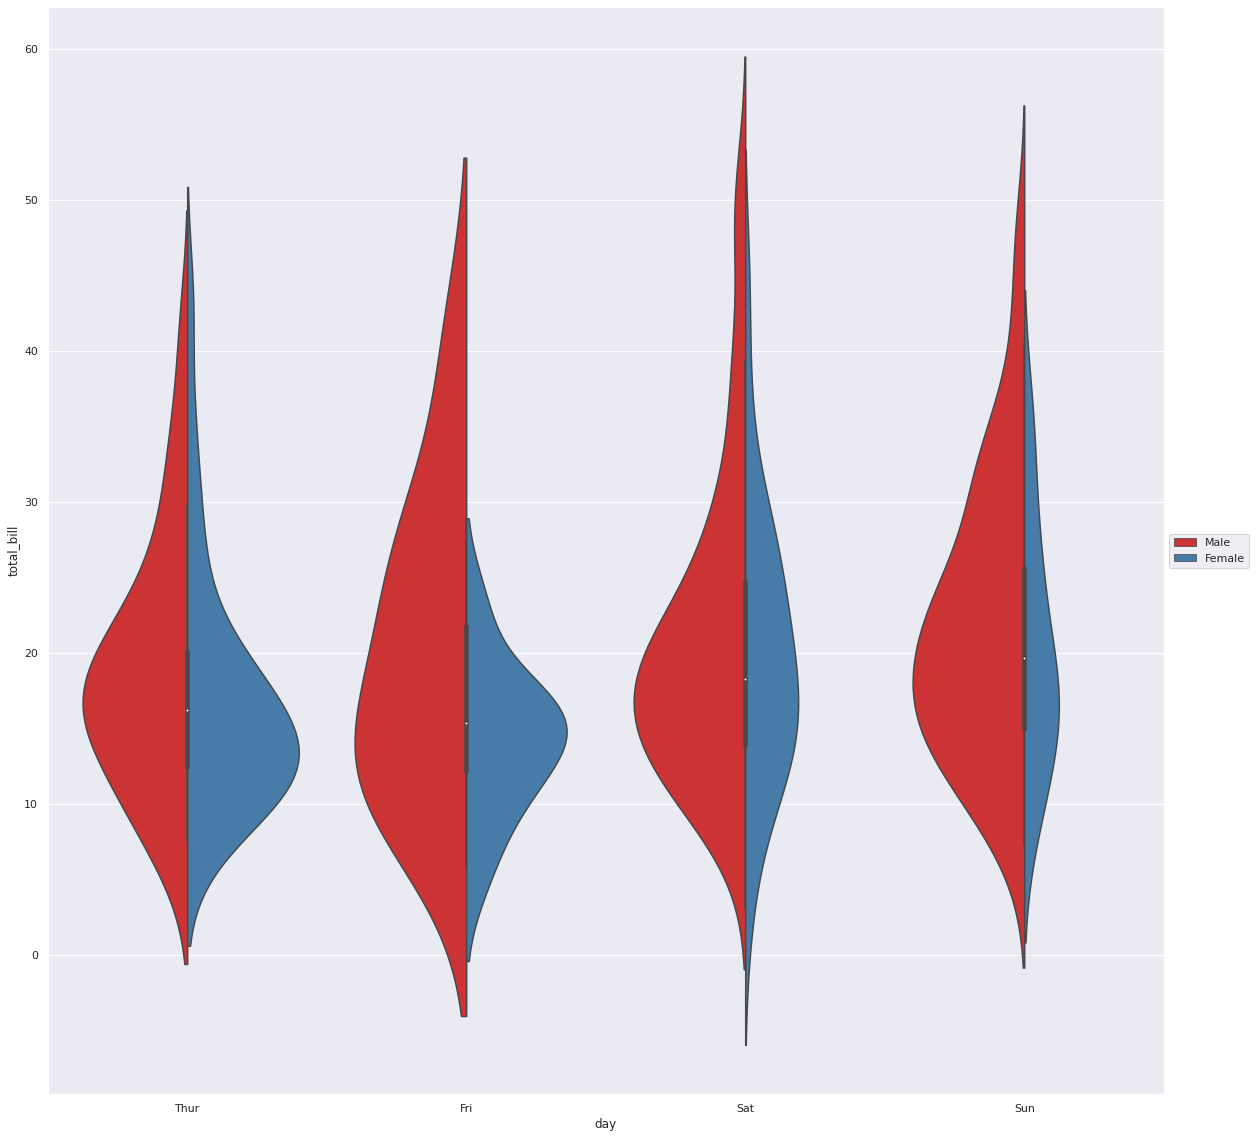

In [ ]:
sns.violinplot(x="day", 
               y="total_bill", 
               data=dataset,
               hue='sex',
               split=True,
               scale='count',
               palette='Set1');

sns.set(rc = {'figure.figsize':(20,10)});
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## 5) Scaled hue violinplot

* Với " scale_hue= " em có thể scale theo một giá trị của hue

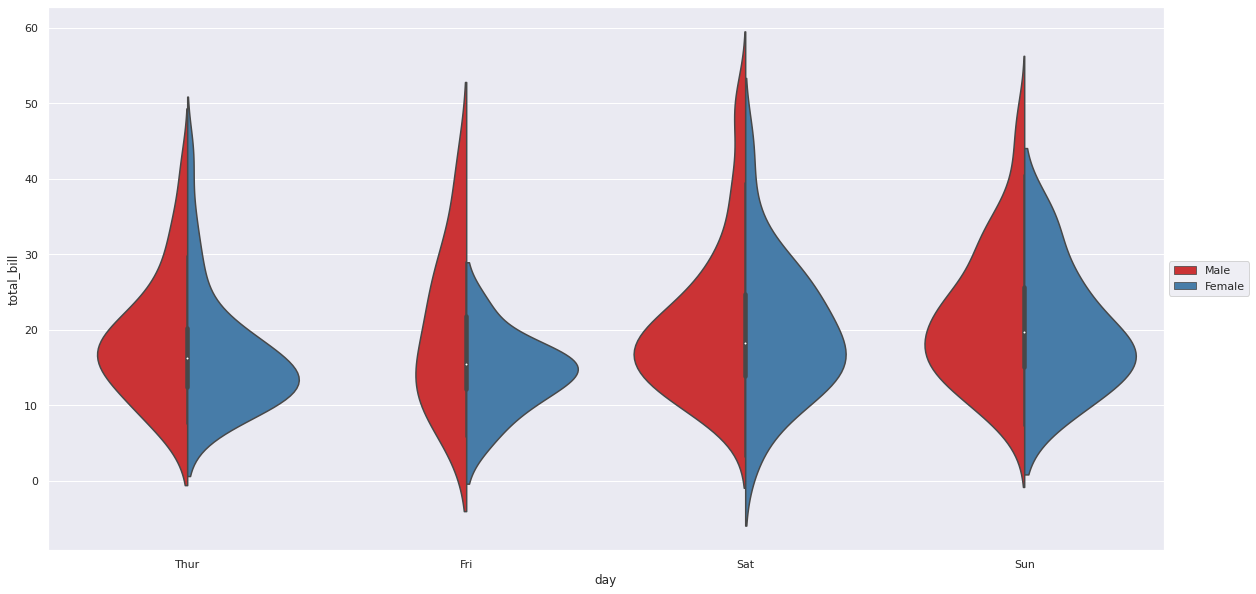

In [ ]:
sns.violinplot(x="day", 
               y="total_bill", 
               data=dataset,
               hue='sex',
               split=True,
               scale_hue='Female',
               palette='Set1');

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## 6) Customize violinplot (order, linewidth, bandwidth)

bandwidth ảnh hưởng độ “smooth” của đường cong kết quả 

* Với 'order=' xếp thứ tự theo list

* Với 'linewidth =' set độ rộng của đường kde

* Với 'bw=' set độ “smooth” của đường cong

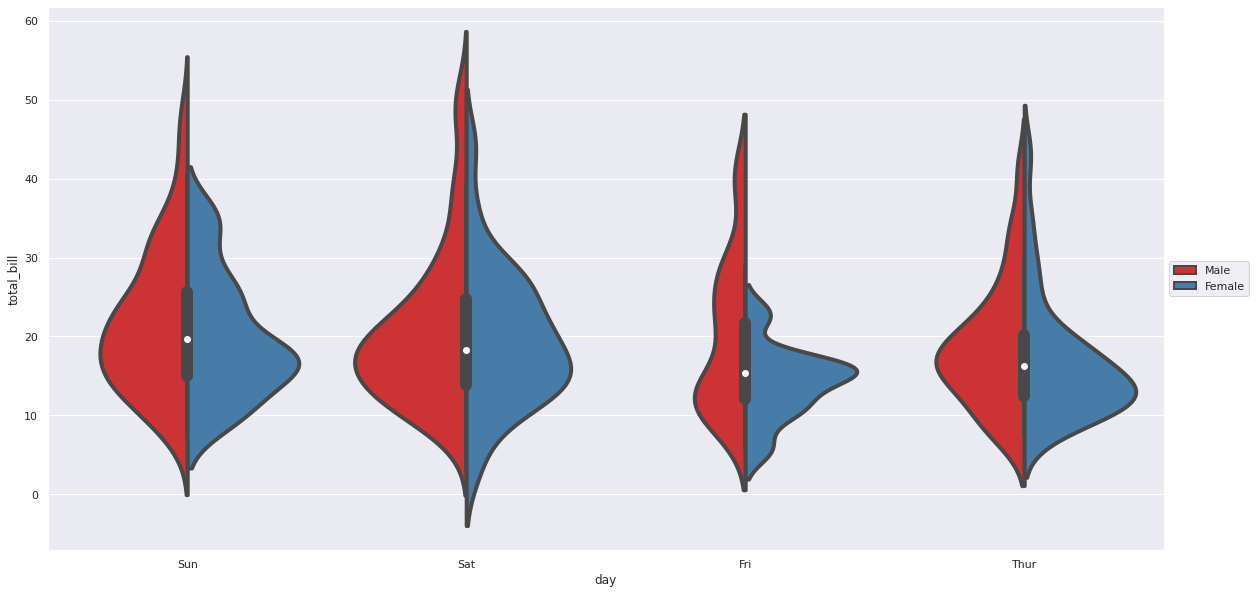

In [ ]:
sns.violinplot(x="day", 
               y="total_bill", 
               data=dataset,
               hue='sex',
               split=True,
               order = ['Sun', 'Sat', 'Fri', 'Thur'],
               linewidth = 4,
               bw=0.4,
               palette='Set1');

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

# IV) stripplot (categorical scatter plot)

* Stripplot sẽ vẽ một biểu đồ phân tán (scatterplot) trong đó một biến là categorical. 

* Stripplot có thể được vẽ theo cách riêng của nó, nhưng nó cũng là một bổ sung tốt cho box or violin plot trong trường hợp bạn muốn hiển thị tất cả các observations cùng với một số biểu diễn của underlying distribution.

* Với chức năng jitter của Stripplot sẽ chuyển các điểm có giá trị giống nhau randomly lên hoặc xuống để thể hiện hết các point

## 1) Stripplot (basic)

* Với "jitter=" Mặc định sẽ là True. 

    Khi chuyển qua False sẽ biến plot thành 1 đường thẳng. 
    
    Nhưng ta có thể chỉnh mức độ (mức độ càng cao data point sẽ càng giãn ra)

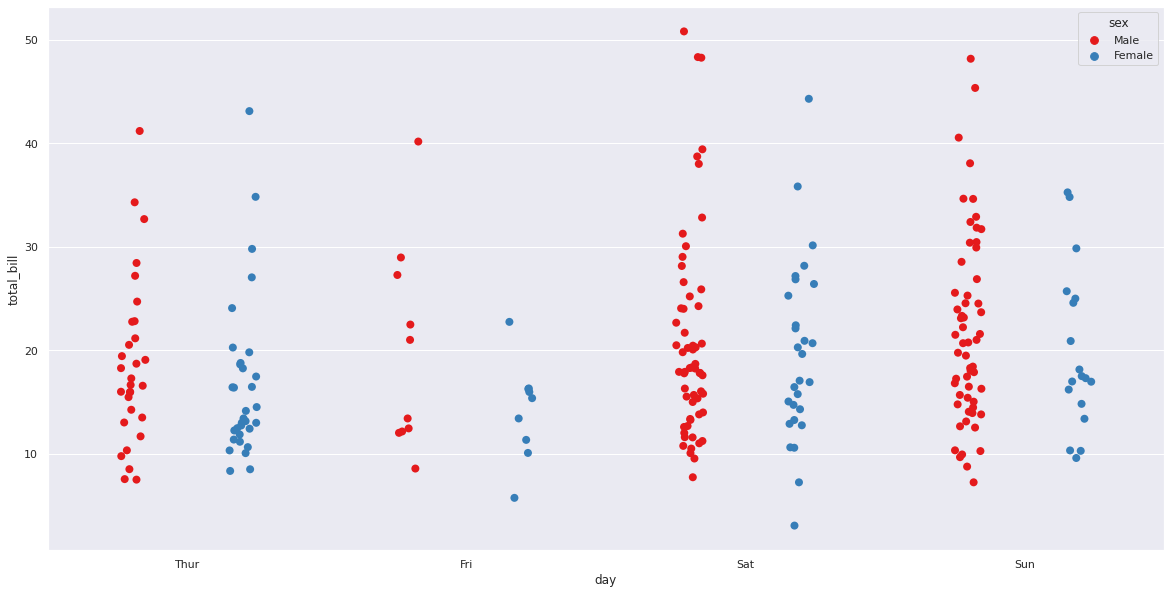

In [ ]:
sns.stripplot(x="day", 
              y="total_bill", 
              data=dataset,
              jitter=True,
              hue='sex',
              palette='Set1',
              size = 8,
              split=True);

1) Stripplot (customize)

* Với "dodge=True" có tác dụng như "split=True"

* Với "size=" càng lớn thì "alpha=" càng nhỏ do khi kích thước tăng thì các data point sẽ chồng nhau cần làm mờ nhiều hơn để thấ rõ 

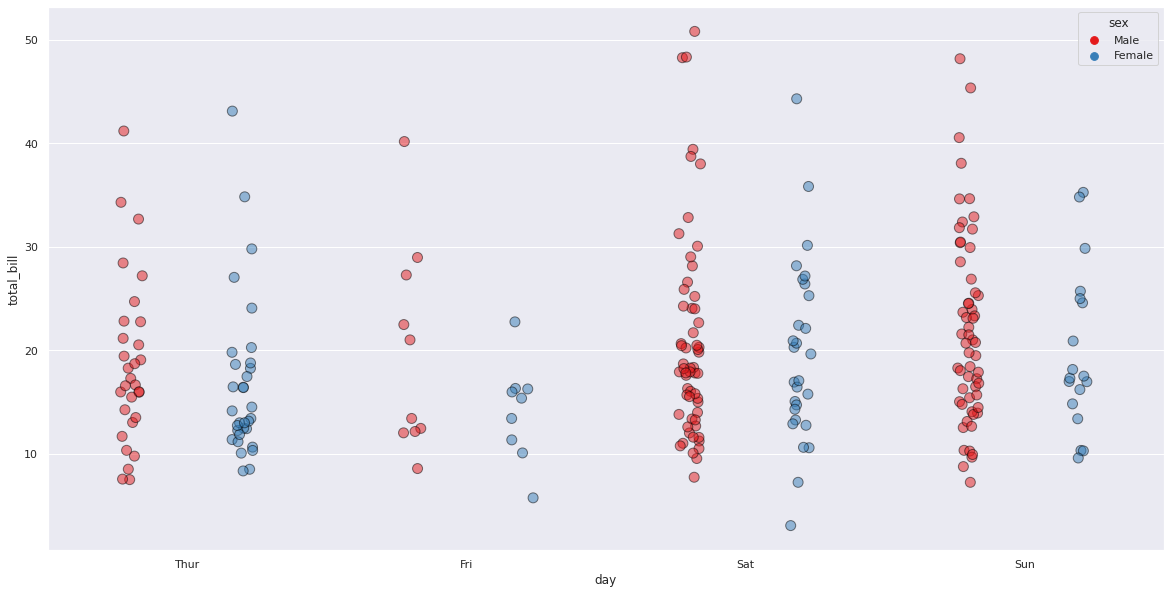

In [ ]:
sns.stripplot(x="day", 
              y="total_bill", 
              data=dataset,
              hue='sex',
              jitter=0.08,
              palette='Set1',
              size = 10,
              dodge=True,
              linewidth = 1,
              edgecolor = 'black',
              alpha=0.5);

# V) swarmplot (categorical scatter plot)

Swarmplot tương tự như stripplot(), nhưng các điểm được điều chỉnh (chỉ dọc theo trục phân loại (categorical axis)) để chúng không trùng lặp. 

Điều này cho thấy sự thể hiện tốt hơn về sự phân bố của các giá trị (distribution of values), mặc dù nó không scale với số lượng lớn các observations (cả về khả năng hiển thị tất cả các điểm và về tính toán cần thiết để sắp xếp chúng).

## 1) Swarmplot (basic)

Với các thông số như stripplot

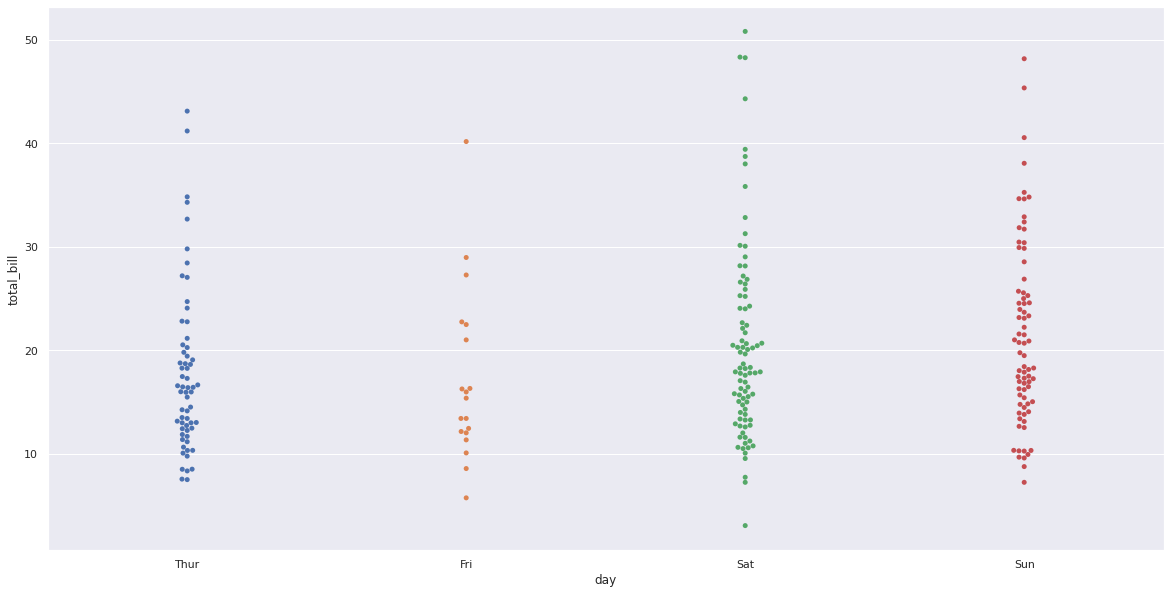

In [ ]:
sns.swarmplot(x="day", y="total_bill", data=dataset)

## 2) Multiple Swarmplot with hue

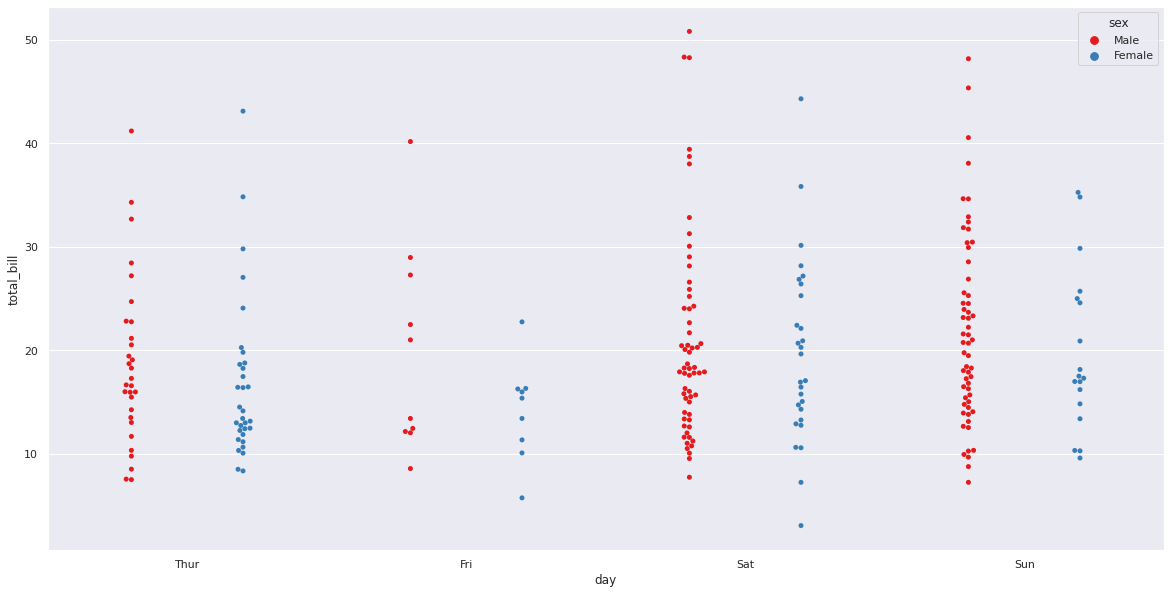

In [ ]:
sns.swarmplot(x="day", 
              y="total_bill",
              hue='sex',
              data=dataset, 
              palette="Set1", 
              split=True)

## 3) Combine swarm plot with kde plot

* Em vẫn tạo 2 loại plot như trên và sẽ đượt biểu đồ

* Ngoại trừ kde plot ta cũng có thể sử dụng boxplot

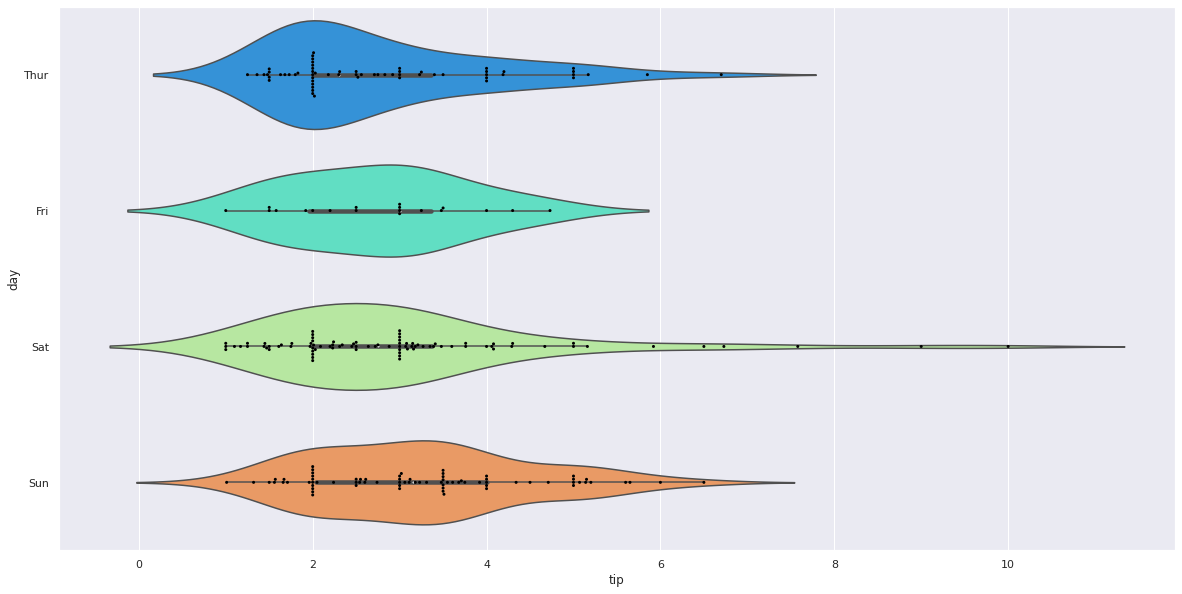

In [ ]:
sns.violinplot(x="tip", y="day", data=dataset,palette='rainbow');
sns.swarmplot(x="tip", y="day", data=dataset,color='black',size=3);

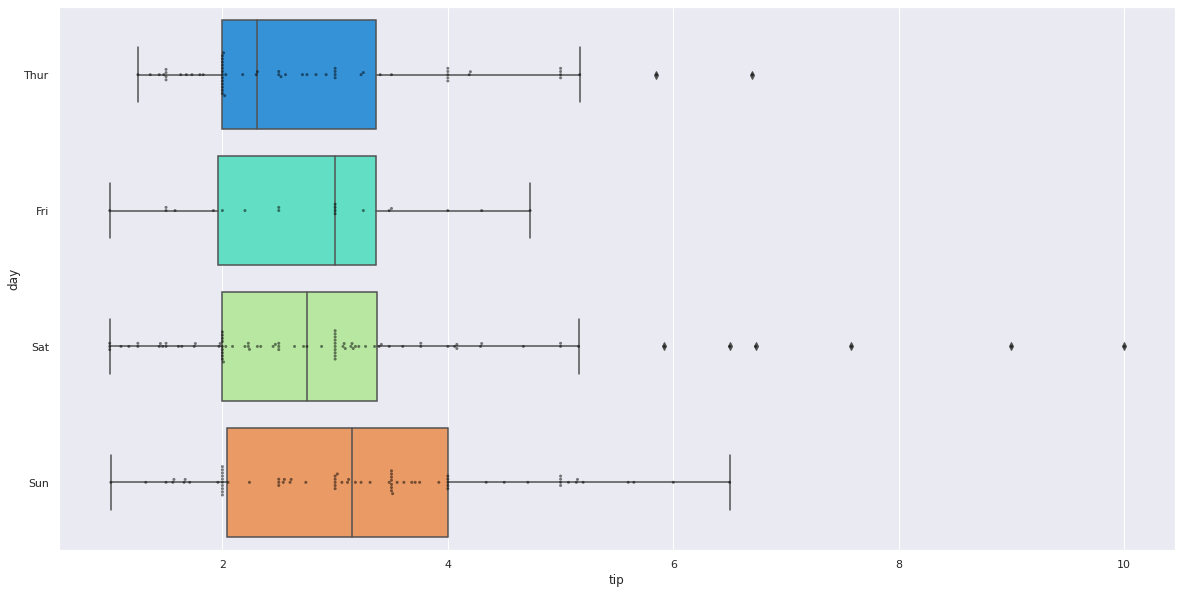

In [ ]:
sns.boxplot(x="tip", y="day", data=dataset,palette='rainbow');
sns.swarmplot(x="tip", y="day", data=dataset,color='black',size=3, alpha=0.5);

# VI) factorplot

* Hiển thị nhiều loại biểu đồ trong cùng một đồ thị

* factorplot là hình thức chung nhất của categorical plot. Nó có thể sử dụng tham số " kind " để điều chỉnh loại plot:

## 1) Factorplot (original)

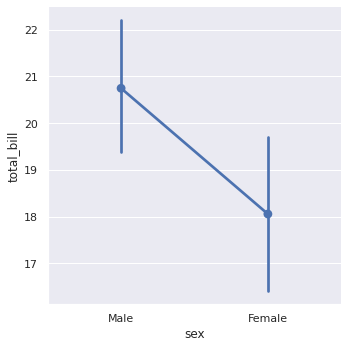

In [ ]:
sns.factorplot(x='sex',y='total_bill',data=dataset);

## 2) Factorplot (barplot)

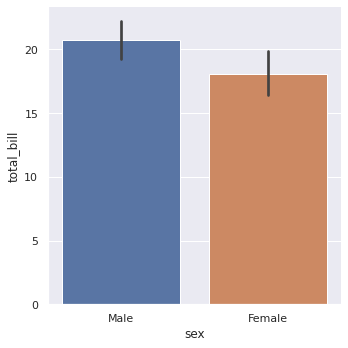

In [ ]:
sns.factorplot(x='sex',y='total_bill',data=dataset,kind='bar');

## 3) Factorplot (boxplot)

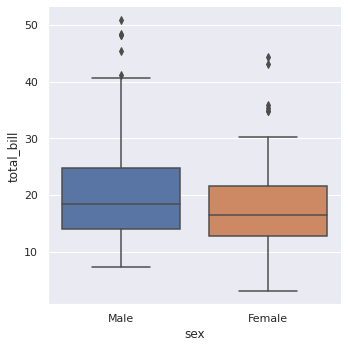

In [ ]:
sns.factorplot(x='sex',y='total_bill',data=dataset,kind='box');